In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

#  0-1. 태그 코드

법정동 행정동 두가지 기준

* location : 주소 데이터 프레임
* TAG : 읍면동 기준 데이터 프레임
* H : 행정동기준
* B : 법정동기준

* Tag : 시군구 기준 데이터 프레임
* tag : 시도 기준 데이터 프레임


UNI : 대학교 정보 + 반경거리

In [3]:
location = pd.read_csv('./dataset/LOC.csv', encoding= 'utf-8') # 행정동과 법정동 별 데이터프레임

location['행정동'] = location['시도'] +' '+ location['시군구']+ ' ' + location['읍면동']
location['시군구'] = location['시군구'].fillna("세종시")
location['코드']=location['코드'].astype(str)

location['시도코드'] = location['코드'].map(lambda x: x[0:2])
location['시군구코드'] = location['코드'].map(lambda x: x[0:5])
location['읍면동코드'] = location['코드'].map(lambda x: x[0:8]+'00')
location['주소코드'] = location['코드']

del location['코드']

In [4]:
# location

In [5]:
TAG = location[['코드종류','시도코드','시군구코드','읍면동코드','시도','시군구','읍면동','위도','경도']].groupby(['코드종류','시도코드','시도','시군구코드','시군구','읍면동코드','읍면동','위도','경도']).mean()
TAG.reset_index(inplace =True)
Tag = TAG.drop(['읍면동','읍면동코드'], axis=1).groupby(['코드종류','시도코드','시도','시군구코드','시군구']).mean()

Tag.reset_index(inplace = True)
tag = Tag.drop(['시군구','시군구코드'], axis=1).groupby(['코드종류','시도코드','시도']).mean()
tag.reset_index(inplace =True)

# location.columns

In [6]:
H = TAG[TAG.코드종류 == 'H']
B = TAG[TAG.코드종류 == 'B']

<AxesSubplot:xlabel='경도', ylabel='위도'>

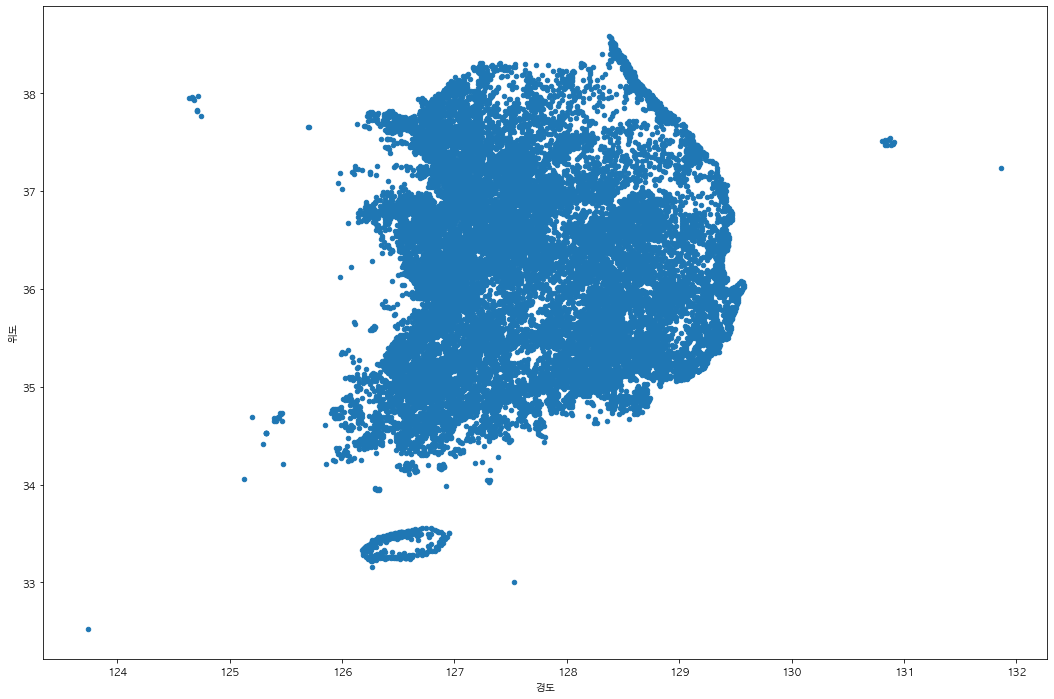

In [7]:
import matplotlib.pyplot as plt
location.plot(kind='scatter', x= '경도', y='위도',figsize = (18,12))

# 0-2. 폐교 예정 대학교

In [11]:
UNI = pd.read_csv('./dataset/uni_location.csv', encoding= 'utf-8')
# UNI.columns , UNI.info()

UNI['반경']= UNI['면적(m^2)'].apply(lambda x : np.sqrt(x))
# UNI.drop(['Unnamed: 0'], axis=1 ,inplace =True)

UNI['시도'] = UNI['행정동'].map(lambda x: x.split(' ')[0])
UNI['시군구'] = UNI['행정동'].map(lambda x: x.split(' ')[1])
UNI['읍면동'] = UNI['행정동'].map(lambda x: x.split(' ')[2])
UNI['하위'] = UNI['행정동'].map(lambda x: x.split(' ')[3] if x.count(' ')>=3 else '-')


UNI['좌표'] = UNI.apply(lambda x : (x['x좌표'],x['y좌표']) ,axis=1)

UNI.drop(['주소','x좌표','y좌표'], axis=1, inplace =True)

In [12]:
UNI['반경']= UNI['면적(m^2)'].apply(lambda x : np.sqrt(x))
UNI.drop(['Unnamed: 0'], axis=1 ,inplace =True)

UNI['시도'] = UNI['행정동'].map(lambda x: x.split(' ')[0])
UNI['시군구'] = UNI['행정동'].map(lambda x: x.split(' ')[1])
UNI['읍면동'] = UNI['행정동'].map(lambda x: x.split(' ')[2])
UNI['하위'] = UNI['행정동'].map(lambda x: x.split(' ')[3] if x.count(' ')>=3 else '-')




In [13]:
UNI.drop(['주소','x좌표','y좌표'], axis=1, inplace =True)

KeyError: "['주소' 'x좌표' 'y좌표'] not found in axis"

In [14]:
# UNI

In [15]:
result = location[location['코드종류']=='B']
result = UNI.merge(result , how ='left', left_on =['시도', '시군구', '읍면동','하위'], right_on=['시도', '시군구', '읍면동','하위'])

result.drop(['위도','경도','행정동_y','행정동_x'], axis= 1, inplace=True)

In [16]:
# result

In [17]:
mapping = pd.read_excel('./dataset/mapping.xlsx')
mapping['법정동코드'] =mapping['법정동코드'].astype(str)

the_uni = pd.merge(result, mapping, how='left', left_on='주소코드', right_on='법정동코드')
the_uni = the_uni[['대학교','좌표','면적(m^2)','반경','행정동코드','시도명','시군구명','읍면동명','법정동코드','동리명']]
the_uni['시도코드'] = the_uni['행정동코드'].apply(lambda x: str(x)[0:2]).astype(int)
the_uni['시군구코드'] = the_uni['행정동코드'].apply(lambda x: str(x)[0:5]).astype(int)
# the_uni

# 1. 지역별 사업체 및 인구 데이터

In [19]:
# load dataset //


# 18개 파일 병합
myLst = []
for i in range(1,18):
    path= './market_data/file%d.csv'%i
    data = pd.read_csv(path, encoding='utf-8',dtype={'호정보':'str'})
    myLst.append(data)

df =pd.concat(myLst)
# df.info()
# df.columns
# df.isnull().sum()

/Users/hongdongsoo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df.drop(['상가업소번호', '상호명', '지점명','지번본번지', '지번부번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호',
       '대지구분코드', '대지구분명', '동정보', '표준산업분류코드', '표준산업분류명',
       '층정보', '호정보'],axis=1,inplace=True)
# df.columns

In [21]:
df['좌표'] = df.apply(lambda x: (x['경도'], x['위도']), axis=1)

In [22]:
df['시도코드'] = df['시도코드'].astype(str)
df['시군구코드'] = df['시군구코드'].astype(str)

In [23]:
# df.info() , df.count()

## 학교 별 지역 상권 사업체 데이터

* store_results : 학교 별 지역 사업체의 갯수와 거리 데이터
* 학교의 지름 + 1km 이내의 거리

In [24]:
results = df.merge(result, how='left', left_on=['시도코드','시군구코드'], right_on=['시도코드','시군구코드'])

results = results.dropna()

from haversine import haversine


results['1km 이내 거리(m)']= results.apply(lambda x: haversine(x['좌표_x'], x['좌표_y'], unit='m')- x['반경']
                                  if haversine(x['좌표_x'], x['좌표_y'], unit='m') < x["반경"]+1000 
                                  else np.nan, axis=1)


results.dropna(inplace= True)

In [25]:
store_result = results[['시군구코드','대학교','면적(m^2)','상권업종대분류명',  
       '좌표_x','1km 이내 거리(m)']].groupby(['대학교','면적(m^2)','상권업종대분류명',
       ]).size().to_frame().rename(columns={0:'사업체수'})

store_result.reset_index(inplace =True)

store_result

# results

,대학교,면적(m^2),상권업종대분류명,사업체수
0,강원관광대학교,184661.0,관광/여가/오락,5
1,강원관광대학교,184661.0,부동산,2
2,강원관광대학교,184661.0,생활서비스,49
3,강원관광대학교,184661.0,소매,89
4,강원관광대학교,184661.0,숙박,4
...,...,...,...,...
112,한려대학교,90042.0,소매,108
113,한려대학교,90042.0,숙박,21
114,한려대학교,90042.0,스포츠,5
115,한려대학교,90042.0,음식,155


# 2. 지역별 인구수
population 지역(법정동), 연도별 인구수 증감 데이터 프레임 (2011~2021)

In [26]:
total_pop = pd.read_csv('./dataset/population2.csv', encoding='euc-kr')
print('인구수 데이터프레임 cnt :',len(total_pop))

total_pop.columns
population = total_pop[['[A]행정구역(동읍면)별','행정구역(동읍면)별','2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년',
       '2018 년', '2019 년', '2020 년', '2021 년']]
population.rename(columns= {'[A]행정구역(동읍면)별':'행정동코드', '행정구역(동읍면)별':'읍면동'}, inplace= True)



df1 = population[population['행정동코드']< 100]
df2 = population[ (100 <population['행정동코드']) & (population['행정동코드']< 1000000000)]
df3 = population[ population['행정동코드']>1000000000]

df1 = df1[['행정동코드', '읍면동']].astype(str)
df2 = df2[['행정동코드','읍면동']]

df1.columns = ['시도코드', '시도명']
df2.columns = ['시군구코드', '시군구명']

df2['시도코드'] = df2['시군구코드'].astype(str).apply(lambda x: x[0:2])

df2['시군구코드']=df2['시군구코드'].astype(str)
x = df1.merge(df2, how='right', left_on='시도코드', right_on='시도코드')

df3['시군구코드'] = df3['행정동코드'].astype(str).apply(lambda x: x[0:5])

df['행정동코드'] = df['행정동코드'].astype(str)
population =df3.merge(x, how='left', left_on='시군구코드', right_on='시군구코드')


# population

인구수 데이터프레임 cnt : 4153


Index(['[A]행정구역(동읍면)별', '행정구역(동읍면)별', '[B]5세별', '5세별', '[Item]항목', '항목', '단위',
       '2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년',
       '2018 년', '2019 년', '2020 년', '2021 년', 'Unnamed: 18'],
      dtype='object')

/Users/hongdongsoo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/bz/yvb66_v55xs9ly03bv7w2ymr0000gn/T/ipykernel_2936/110794650.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['시군구코드'] = df3['행정동코드'].astype(str).apply(lambda x: x[0:5])


In [27]:
from haversine import haversine


results['1km 이내 거리(m)']= results.apply(lambda x: haversine(x['좌표_x'], x['좌표_y'], unit='m')- x['반경']
                                  if haversine(x['좌표_x'], x['좌표_y'], unit='m') < x["반경"]+1000 
                                  else np.nan, axis=1)


results.dropna(inplace= True)

In [28]:
POP = population.merge(the_uni, how='right', 
                       left_on= ['행정동코드','시도명','시군구명'], right_on=['행정동코드','시도명', '시군구명'])
# POP.columns

In [29]:
POP.drop(['행정동코드', '읍면동','면적(m^2)', '반경','시군구코드_x',
       '시도코드_x','시도코드_y', '시군구코드_y'] , axis=1, inplace=True)

In [30]:
POP.columns

Index(['2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년',
       '2018 년', '2019 년', '2020 년', '2021 년', '시도명', '시군구명', '대학교', '좌표',
       '읍면동명', '법정동코드', '동리명'],
      dtype='object')

In [31]:
population = POP.groupby(['대학교','시도명','시군구명']).mean()

In [32]:
population = population.fillna(0).astype(int)

In [33]:
# population

# 3. 해당 학교 지역별 순이동 인구

migration 학교별 시군구,연도별 순이동 데이터프레임 (2011~2021)

migration_df 지역,연도별 순이동 현황

In [34]:
# migration : 인구이동 데이터프레임

migration = pd.read_csv('./dataset/ko_migration.csv', encoding='euc-kr')
migration['항목'].unique()
migration['행정구역(시군구)별'] = migration['행정구역(시군구)별'].apply(lambda x: x.replace(' ',''))

array(['총전입', '총전출', '순이동', '시도내이동-시군구내', '시도내이동-시군구간 전입',
       '시도내이동-시군구간 전출', '시도간전입', '시도간전출'], dtype=object)

In [35]:
migration = migration[migration['항목'] =='순이동']
migration['시군구코드'] = migration['[A]행정구역(시군구)별']
del migration['항목']
del migration['[A]행정구역(시군구)별']

migration = migration.drop(migration[migration['시군구코드'] <= 100].index)
migration.columns

Index(['행정구역(시군구)별', '[Item]항목', '단위', '2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년',
       'Unnamed: 16', '시군구코드'],
      dtype='object')

In [36]:
migration.reset_index(drop =True, inplace =True)
migration['시도코드'] = migration['시군구코드'].astype(str).map(lambda x: x[0:2] ).astype(int)

In [37]:
# migration.info()

In [38]:
migration.drop(['[Item]항목','단위','Unnamed: 16'], axis=1, inplace =True)
migration.rename(columns={'행정구역(시군구)별':'시군구명'}, inplace =True)


In [39]:
Migration = the_uni.merge(migration, how='left', left_on=['시군구코드','시군구명'] , right_on=['시군구코드','시군구명'])
Migration = Migration[['대학교','시도명','시군구명','2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년']]
Migration = Migration.drop_duplicates().reset_index(drop= True).set_index(['대학교','시도명','시군구명'])
# Migration

In [40]:
Migration = Migration.transpose()

## 4. 외국인 데이터프레임

* foreigner : 연도별 외국인수 데이터 프레임
* foreigner_student : 대학교 지역별 유학생수 데이터 프레임

In [41]:
x = the_uni[['대학교','시도명','시군구명']].drop_duplicates().reset_index(drop=True)

foreigner = pd.read_csv('./dataset/foreigner.csv', encoding='euc-kr')
foreigner.rename(columns={'행정구역(시군구)별':'시군구명'}, inplace=True)

foreigner['시군구코드'] = foreigner['[11101HJG]행정구역(시군구)별'].map(lambda x: x.split('G')[1][0:5]).astype(int)
foreigner = foreigner.drop(['[15110AA0]거주외국인별','단위'
                            ,'성별','[C01]성별','[Item]항목','항목','Unnamed: 15','2015 년'],axis=1)
len(foreigner.loc[foreigner['시군구명']=='합계','시군구명'])

foreigner['시도코드'] = foreigner['시군구코드'].apply(lambda x: str(x)[0:2] if len(str(x))>= 2 else str(x))
foreigner['시도명'] = foreigner.apply(lambda x: x['시군구명'] if x['시군구코드']<= 100 else np.nan , axis=1)
foreigner['시도명'] = foreigner['시도명'].fillna(method='ffill')

x = foreigner[['시도명','시군구명', '거주외국인별', '2016 년', '2017 년', '2018 년',
       '2019 년', '2020 년']].merge(x, how='left', left_on=['시도명','시군구명'],right_on=['시도명','시군구명']).dropna()

x.reset_index(drop=True,inplace=True)

foreign_student = x

foreign_student =foreign_student[foreign_student['거주외국인별'] == '유학생'].drop(['거주외국인별'],axis=1)
foreign_student = foreign_student.groupby(['대학교','시도명','시군구명']).sum().transpose()

16

In [42]:
# foreigner['거주외국인별'].unique()

In [43]:
# foreign_student

# 5. 대학교 현황 데이터프레임

university , faculty , student 지역별 연도별 대학수, 교원수, 학생수 데이터프레임(2007~2011)

total_uni 시도별 집계량
uni 시군구별 현황

In [44]:
x = the_uni[['대학교','시도명','시군구명']].drop_duplicates().reset_index(drop=True)
# x.columns

In [45]:
# 대학 관련 데이터

faculty = pd.read_csv('./dataset/faculty.csv', encoding='euc-kr')
student = pd.read_csv('./dataset/student.csv', encoding='euc-kr')
university = pd.read_csv('./dataset/university.csv', encoding='euc-kr')

faculty['시군구코드'] = faculty['A 행정구역별'].map(lambda x : x.split(' ')[0])
faculty['시군구'] = faculty['A 행정구역별'].map(lambda x : x.split(' ')[1])

student['시군구코드'] = student['A 행정구역별'].map(lambda x : x.split(' ')[0])
student['시군구'] = student['A 행정구역별'].map(lambda x : x.split(' ')[1])

university.rename(columns={'SGG 행정구역별' :'A 행정구역별'},inplace =True)
university['시군구코드'] = university['A 행정구역별'].map(lambda x : x.split(' ')[0])
university['시군구'] = university['A 행정구역별'].map(lambda x : x.split(' ')[1])

faculty['시군구코드'] = faculty['시군구코드'].replace("A", "0").astype(int)
student['시군구코드'] = student['시군구코드'].replace("A", "0").astype(int)
university['시군구코드'] = university['시군구코드'].replace("SGG", "0").astype(int)



faculty['시도명'] = faculty.apply(lambda x: x['시군구'] if x['시군구코드']<= 100 else np.nan , axis=1)
faculty['시도명'] = faculty['시도명'].fillna(method='ffill')

student['시도명'] = student.apply(lambda x: x['시군구'] if x['시군구코드']<= 100 else np.nan , axis=1)
student['시도명'] = student['시도명'].fillna(method='ffill')

university['시도명'] = university.apply(lambda x: x['시군구'] if x['시군구코드']<= 100 else np.nan , axis=1)
university['시도명'] = university['시도명'].fillna(method='ffill')

del faculty['A 행정구역별'],student['A 행정구역별'],university['A 행정구역별']

faculty = faculty.drop(0).fillna(0)
student = student.drop(0).fillna(0)
university = university.drop(0).fillna(0)

the_student = x.merge(student, how='left', left_on=['시도명','시군구명'], right_on=['시도명', '시군구']).drop(['시군구코드','시군구'],axis=1)
the_faculty = x.merge(faculty, how='left', left_on=['시도명','시군구명'], right_on=['시도명', '시군구']).drop(['시군구코드','시군구'],axis=1)
the_student = the_student.set_index(['대학교','시도명','시군구명']).transpose()
the_faculty = the_faculty.set_index(['대학교','시도명','시군구명']).transpose()

In [46]:
# x

In [47]:
# student
# faculty
# university

In [48]:
# the_student.head(5)
# the_faculty.head(5)

In [49]:
student

,Y2007 2007,Y2008 2008,Y2009 2009,Y2010 2010,Y2011 2011,Y2012 2012,Y2013 2013,Y2014 2014,Y2015 2015,Y2016 2016,Y2017 2017,Y2018 2018,Y2019 2019,Y2020 2020,Y2021 2021,시군구코드,시군구,시도명
1,2910719,2901283,2911219,2951282,2985346,2988168,2971894,2947495,2894405,2831169,2769522,2721315,2676858,2633787,2544243,0,전국,전국
2,541288,527195,533420,553674,555787,574067,570583,575724,567207,562690,560323,560944,562971,563889,560242,11,서울특별시,서울특별시
3,28819,29417,29688,42149,41860,40895,40426,39902,39741,39434,39179,39033,38918,38626,38098,11010,종로구,서울특별시
4,23383,23416,23569,24544,24570,24394,23832,23321,23004,22678,22580,22672,22731,22740,22409,11020,중구,서울특별시
5,28064,12352,12596,13063,13259,13327,13227,13084,12847,12566,12317,12160,12141,12094,12065,11030,용산구,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1939,1835,1813,1796,1814,1827,1758,1705,1639,1634,1567,1490,1404,1355,1291,38350,남해군,경상남도
171,1863,1840,1877,2095,2353,2503,2725,2828,2878,2960,2973,2949,2829,2674,2492,38390,거창군,경상남도
172,29593,29253,28806,29150,29708,29482,29758,30239,30512,30399,30144,30055,29634,28773,27494,39,제주특별자치도,제주특별자치도
173,28578,28217,27855,28238,28781,28883,29418,30239,30512,30399,30144,30055,29634,28773,27494,39010,제주시,제주특별자치도


# 시군구별 면적

In [50]:
area = pd.read_csv('./area.csv', encoding='euc-kr')
area = area[(area['레벨01']=='계')&(area['항목']=='면적')].drop(['Unnamed: 10','[Item]항목','레벨01','단위','[13101874596A]시도','[13101874596B]시군구','[13101874596C]레벨01'], axis=1)
area['시군구']=area.apply(lambda x: x['시군구'] if x['시도']!=x['시군구'] else '합계', axis=1)
area.reset_index(drop=True, inplace= True)
area = area.rename(columns = {'2020 년': '면적(km^2)'})
area['면적(km^2)'] = area['면적(km^2)'].apply(lambda x: x/1000000)



total_area = area[area['시군구']=='합계']
total_area.drop(['시군구','항목'],axis=1,inplace =True)

local_area = area[area['시군구']!='합계']
local_area.drop(['항목'], axis=1,inplace =True)

a = total_area[total_area['시도']=='세종특별자치시']

local_area = pd.concat([local_area,a],join='outer' )
local_area = local_area.fillna('세종특별자치시')
local_area = local_area.replace('세종특별자치시','세종').sort_values(by='시도').set_index('시도').reset_index()


total_area =total_area[total_area['시도']!='세종특별자치시'].set_index('시도').reset_index()


a = total_area['시도'].drop(0)

a = sorted(list(a.unique()))
b= sorted(list(H['시도'].unique()))

ch_sido = pd.Series(dict(zip(a,b))).to_frame().reset_index()
ch_sido.columns = ['시도', '시도명']

total_area = total_area.merge(ch_sido, how='left')[['시도명','면적(km^2)']]
local_area = local_area.merge(ch_sido, how='left')[['시도명','시군구','면적(km^2)']]

/Users/hongdongsoo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
# total_area, local_area

# 단위면적(km^2) 당 인구수

In [52]:
unit_area_population = local_area.merge(population.reset_index(), how='right', left_on=['시도명','시군구'], right_on=['시도명','시군구명'])
unit_area_population = unit_area_population.drop('시군구',axis=1).set_index(['대학교','시도명','시군구명']).astype(float)


for i in range(2011,2022):
    the_name = str(i)+' 년'
    unit_area_population[i] = unit_area_population[the_name].div(unit_area_population['면적(km^2)'])
    
the_name = list(range(2011,2022))
UAP = unit_area_population[the_name]
UAP = UAP.replace(0,np.nan).transpose().fillna(method='bfill').transpose()
# UAP

# 결과값

In [48]:
# results # 해당 학교별 1km 거리내 상권상세분류
# store_result # 해당 학교별 1km 거리내 업종별 사업체수

# population # 해당 대학교 법정동 내 인구수 연도별 변화량
# Migration # 해당 대학교 시군구 별 지역내 연도별 순인구 변화량
# foreign_student # 해당 대학교 인접 시군구별 연도별 유학생 변화량

# the_student # 해당 대학교 지역별 연도별 학생수 변화량
# the_faculty # 해당 대학교 지역별 연도별 교원수 변화량
# university # 해당 대학교 지역별 연도별 대학수 변화량

# local_area # 지역(시군구)별 면적(km^2)
# UAP # 해당 대학의 unit_area_population 단위면적(km^2) 별 인구수

In [49]:
# 저장

results.to_csv('./result/MARKET_detail.csv')
store_result.to_csv('./result/MARKET_count.csv')

population.to_csv('./result/population')
Migration.to_csv('./result/migration.csv')
foreign_student.to_csv('./result/foreign_student.csv')

the_student.to_csv('./result/student.csv')
the_faculty.to_csv('./result/faculty.csv')
university.to_csv('./result/university.csv')

local_area.to_csv('./result/local_area.csv')
UAP.to_csv('./result/unit_area_population.csv')

In [50]:
# results.columns

In [53]:
store_detail = results.drop(['상권업종대분류코드','상권업종중분류코드','상권업종소분류코드','코드종류', '읍면동코드', '주소코드','시도코드','시군구코드','행정동코드','법정동코드'],axis=1)
store_detail = store_detail[['대학교','좌표_y','반경','시도명','시군구명','행정동명','1km 이내 거리(m)','상권업종대분류명','상권업종중분류명','상권업종소분류명','경도','위도']]
store_detail = store_detail.rename(columns={'좌표_y':'대학교 좌표'})
store_detail.reset_index(drop=True,inplace=True)
store_detail['대학교_x'] = store_detail['대학교 좌표'].apply(lambda x: str(x).split(',')[0][1:-1]).astype(float)
store_detail['대학교_y'] = store_detail['대학교 좌표'].apply(lambda x: str(x).split(',')[1][1:-2]).astype(float)

In [54]:
# store_detail

In [55]:
student_data = the_student.transpose().reset_index()
faculty_data = the_faculty.transpose().reset_index()

x= [str(i) for i in range(2007,2022)]
faculty_data = faculty_data.set_index(['대학교','시도명','시군구명']).astype(int)
student_data = student_data.set_index(['대학교','시도명','시군구명']).astype(int)
faculty_data.columns = x
student_data.columns = x

the_result = student_data/faculty_data
the_result = the_result.droplevel(['시도명','시군구명']).reset_index()
the_result.drop(['2007', '2008', '2009', '2010'],axis=1,inplace =True)

# the_result


# -------------------------------01. 02. Result-------------------------------

Text(0.0, 1.0, '강원관광대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d13770df0>,
 [Text(-1.042605458746546, 0.3506762857563999, '음식'),
  Text(0.3175416487380942, -1.1572239633349688, '소매'),
  Text(1.2908903754599672, 0.1536295497123669, '생활서비스'),
  Text(0.8688534005065393, 1.0977676295228531, '학문/교육'),
  Text(0.4561724244995764, 1.4289530150170013, '스포츠'),
  Text(0.2787389100062738, 1.5755331224853748, '관광/여가/오락'),
  Text(0.13992587120338623, 1.6942316106624777, '숙박'),
  Text(0.03707870260652592, 1.7996180622045939, '부동산')],
 [Text(-0.5686938865890251, 0.1912779740489454, '39.7%'),
  Text(0.18523262843055494, -0.6750473119453984, '29.2%'),
  Text(0.7943940772061338, 0.09454126136145652, '16.1%'),
  Text(0.5585486146113466, 0.7057077618361197, '8.9%'),
  Text(0.30411494966638425, 0.9526353433446675, '2.6%'),
  Text(0.1916330006293132, 1.083179021708695, '1.6%'),
  Text(0.09877120320239027, 1.195928195761749, '1.3%'),
  Text(0.026779062993602047, 1.299724156036651, '0.7%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '강원관광대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '두원공대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8e7a974400>,
 [Text(-1.098646965149322, 0.054542148547563424, '음식'),
  Text(0.8343825718585837, -0.8624417219607686, '소매'),
  Text(1.1276200745433735, 0.646894865868324, '생활서비스'),
  Text(0.656124548033812, 1.236729791614735, '부동산'),
  Text(0.4398752170189826, 1.434053622934827, '학문/교육'),
  Text(0.2763897205301318, 1.575946928797184, '관광/여가/오락'),
  Text(0.15438660781148214, 1.6929751254311045, '스포츠'),
  Text(0.04463930753235898, 1.799446396040469, '숙박')],
 [Text(-0.5992619809905393, 0.0297502628441255, '48.4%'),
  Text(0.48672316691750706, -0.503091004477115, '27.6%'),
  Text(0.6939200458728453, 0.39808914822666097, '14.5%'),
  Text(0.42179435230745055, 0.7950405803237582, '3.4%'),
  Text(0.2932501446793217, 0.956035748623218, '2.6%'),
  Text(0.19001793286446556, 1.083463513548064, '1.3%'),
  Text(0.10897878198457563, 1.1950412650101914, '1.3%'),
  Text(0.03223949988448148, 1.2996001749181163, '0.8%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '두원공대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '신경대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d144273a0>,
 [Text(-1.011977398375583, 0.4311632465516821, '음식'),
  Text(-0.09655982072321474, -1.1961087747449648, '소매'),
  Text(1.2108178287207063, -0.47320205584092184, '생활서비스'),
  Text(1.2124355379904095, 0.7000000472985031, '학문/교육'),
  Text(0.6293608629802467, 1.3615817655024465, '부동산'),
  Text(0.19285859796674634, 1.5883342095385031, '스포츠'),
  Text(0.10264334765764012, 1.6968984481051403, '관광/여가/오락'),
  Text(0.03624659104158827, 1.7996350142842479, '숙박')],
 [Text(-0.5519876718412271, 0.23517995266455383, '37.2%'),
  Text(-0.056326562088541934, -0.6977301186012294, '23.1%'),
  Text(0.7451186638281269, -0.2912012651328749, '17.6%'),
  Text(0.7794228458509775, 0.45000003040618053, '10.9%'),
  Text(0.41957390865349775, 0.907721177001631, '8.7%'),
  Text(0.1325902861021381, 1.0919797690577207, '1.3%'),
  Text(0.07245412775833421, 1.1978106692506874, '0.6%'),
  Text(0.026178093530035973, 1.29973639920529, '0.6%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '신경대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '웅지세무대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d147312e0>,
 [Text(-1.0388140212607413, 0.3617532712113164, '음식'),
  Text(0.5109352027408841, -1.085792438083878, '소매'),
  Text(1.2087094244857346, 0.47856193659688867, '생활서비스'),
  Text(0.7989989881207659, 1.1496088974003258, '부동산'),
  Text(0.4932999650237891, 1.4165645571266876, '관광/여가/오락'),
  Text(0.26682998268319147, 1.5775936613530392, '학문/교육'),
  Text(0.07118859318418594, 1.6985088119289982, '숙박')],
 [Text(-0.5666258297785861, 0.19731996611526345, '39.3%'),
  Text(0.29804553493218233, -0.6333789222155953, '35.3%'),
  Text(0.7438211842989135, 0.294499653290393, '12.7%'),
  Text(0.5136422066490638, 0.7390342911859237, '6.0%'),
  Text(0.3288666433491927, 0.9443763714177917, '2.7%'),
  Text(0.18344561309469415, 1.0845956421802145, '2.7%'),
  Text(0.05025077165942536, 1.1989473966557633, '1.3%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '웅지세무대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '한국국제대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1d8d3dc0>,
 [Text(-1.0939740856227893, 0.1149813027660692, '소매'),
  Text(1.039230503266677, -0.5999999675667402, '음식'),
  Text(0.6499999385119435, 1.125833060419914, '생활서비스'),
  Text(0.1463397584094602, 1.3923306629923298, '부동산')],
 [Text(-0.5967131376124304, 0.06271707423603774, '46.7%'),
  Text(0.6062177935722282, -0.34999998108059843, '40.0%'),
  Text(0.399999962161196, 0.6928203448737932, '10.0%'),
  Text(0.09407555897751013, 0.8950697119236406, '3.3%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '한국국제대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '서라벌대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1dc6beb0>,
 [Text(-1.032474621674316, 0.37946825374262644, '음식'),
  Text(-0.07399391237404594, -1.19771653613515, '소매'),
  Text(1.1981455951019564, -0.5044275299166163, '생활서비스'),
  Text(1.1480730826443215, 0.8012042167310189, '학문/교육'),
  Text(0.6557847449859833, 1.3490538789254005, '관광/여가/오락'),
  Text(0.4701107925832052, 1.5293775997760628, '부동산'),
  Text(0.2956802460493529, 1.674088764700425, '숙박'),
  Text(0.10175197131487831, 1.7971217366482262, '스포츠')],
 [Text(-0.5631679754587178, 0.2069826838596144, '38.8%'),
  Text(-0.04316311555152679, -0.6986679794121707, '20.5%'),
  Text(0.7373203662165885, -0.3104169414871485, '18.8%'),
  Text(0.7380469816999209, 0.5150598536127978, '13.3%'),
  Text(0.43718982999065553, 0.8993692526169336, '2.9%'),
  Text(0.3232011699009536, 1.051447099846043, '2.0%'),
  Text(0.2087154677995432, 1.1817097162591237, '2.0%'),
  Text(0.07348753483852322, 1.297921254245941, '1.8%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '서라벌대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '경주대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1e88cee0>,
 [Text(-1.0692252045755923, 0.25837465413674593, '음식'),
  Text(0.6102373022228106, -1.0332523578370514, '소매'),
  Text(1.1896893482417878, 0.5240603540433397, '생활서비스'),
  Text(0.7119436885550569, 1.2054609841577706, '부동산'),
  Text(0.4380852966082577, 1.434601433463544, '관광/여가/오락'),
  Text(0.28302459180946776, 1.574768897467525, '스포츠'),
  Text(0.1007092278041875, 1.697014334481322, '학문/교육')],
 [Text(-0.583213747950323, 0.14093162952913413, '42.5%'),
  Text(0.35597175962997285, -0.6027305420716134, '32.1%'),
  Text(0.7321165219949463, 0.32249867941128596, '14.2%'),
  Text(0.4576780854996794, 0.7749392041014238, '5.7%'),
  Text(0.2920568644055051, 0.9564009556423625, '1.9%'),
  Text(0.1945794068690091, 1.0826536170089234, '1.9%'),
  Text(0.07108886668530881, 1.1978924713985801, '1.9%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '경주대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '영남외대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1ef0c640>,
 [Text(-1.0488159581030168, 0.33163999461532245, '음식'),
  Text(0.5267555360667686, -1.0782061979153206, '소매'),
  Text(1.2046965211641685, 0.48857577907111893, '생활서비스'),
  Text(0.8048942777953485, 1.145489066544201, '학문/교육'),
  Text(0.5223025593420683, 1.4061294522570549, '숙박'),
  Text(0.2518563573146552, 1.580053282418094, '부동산'),
  Text(0.10070920297825842, 1.6970143359546155, '관광/여가/오락'),
  Text(0.03556303201916344, 1.7996486520300579, '스포츠')],
 [Text(-0.5720814316925545, 0.18089454251744858, '40.3%'),
  Text(0.30727406270561497, -0.6289536154506037, '34.0%'),
  Text(0.7413517053317958, 0.3006620178899193, '13.8%'),
  Text(0.5174320357255812, 0.7363858284927005, '4.4%'),
  Text(0.3482017062280455, 0.9374196348380366, '3.8%'),
  Text(0.17315124565382548, 1.0862866316624396, '2.5%'),
  Text(0.0710888491611236, 1.1978924724385518, '0.6%'),
  Text(0.025684412013840266, 1.299746248688375, '0.6%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '영남외대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '대구예술대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1f2495b0>,
 [Text(-1.083288512416601, -0.19101308558899321, '음식'),
  Text(1.1817693448018531, -0.20837757961594375, '소매'),
  Text(0.44462590356421516, 1.2216005099375598, '학문/교육')],
 [Text(-0.5908846431363277, -0.10418895577581448, '55.6%'),
  Text(0.6893654511344143, -0.1215535881093005, '33.3%'),
  Text(0.2736159406549016, 0.751754159961575, '11.1%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '대구예술대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '대덕대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d1f8a8f40>,
 [Text(-1.097435647331897, 0.07506663683168754, '음식'),
  Text(0.5761883439058867, -1.0526191107646639, '소매'),
  Text(1.2996631504543694, 0.029592150158835415, '학문/교육'),
  Text(0.9080149454908273, 1.0656025801232327, '생활서비스'),
  Text(0.3717117027751487, 1.4532138211632861, '관광/여가/오락'),
  Text(0.21786666113775138, 1.5850975105540632, '스포츠'),
  Text(0.11601212472677916, 1.6960369061186076, '부동산'),
  Text(0.04097377796461592, 1.7995335922175242, '숙박')],
 [Text(-0.5986012621810346, 0.040945438271829566, '47.8%'),
  Text(0.33610986727843384, -0.6140278146127206, '20.3%'),
  Text(0.7997927079719197, 0.018210553943898717, '14.5%'),
  Text(0.5837238935298175, 0.6850302300792209, '12.3%'),
  Text(0.2478078018500991, 0.9688092141088575, '2.2%'),
  Text(0.14978332953220408, 1.0897545385059182, '1.4%'),
  Text(0.08189091157184411, 1.197202521966076, '0.7%'),
  Text(0.029592172974444823, 1.2996631499348785, '0.7%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '대덕대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

/var/folders/bz/yvb66_v55xs9ly03bv7w2ymr0000gn/T/ipykernel_2936/2376200797.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,8))


Text(0.0, 1.0, '부산과학기술대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d131c0f10>,
 [Text(-1.0093098728384988, 0.4373712160061901, '음식'),
  Text(0.25150662880268876, -1.1733475255303976, '소매'),
  Text(1.2645106127812946, 0.30168346020866843, '생활서비스'),
  Text(0.8527123206895646, 1.110352060449395, '학문/교육'),
  Text(0.6396288640549437, 1.356788456712314, '관광/여가/오락'),
  Text(0.41203937948796326, 1.5460347828400156, '부동산'),
  Text(0.1963523838774821, 1.6886224389559763, '숙박'),
  Text(0.0482273989709006, 1.7993538056726093, '스포츠')],
 [Text(-0.5505326579119084, 0.2385661178215582, '37.0%'),
  Text(0.14671220013490174, -0.6844527232260651, '32.8%'),
  Text(0.7781603770961811, 0.18565136012841132, '18.0%'),
  Text(0.5481722061575772, 0.7137977531460398, '3.7%'),
  Text(0.4264192427032958, 0.9045256378082094, '3.1%'),
  Text(0.2832770733979747, 1.0628989132025106, '2.6%'),
  Text(0.13860168273704615, 1.1919687804395127, '2.0%'),
  Text(0.03483089925676154, 1.2995333040968844, '0.9%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '부산과학기술대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '서울기독대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d20378af0>,
 [Text(-1.008860246049637, 0.43840734932328207, '음식'),
  Text(-0.007274192714023748, -1.1999779523476086, '소매'),
  Text(1.295067408162295, -0.1131388894933816, '생활서비스'),
  Text(0.9356786264941545, 1.0413959419558023, '학문/교육'),
  Text(0.5229858997373514, 1.4058754385349768, '부동산'),
  Text(0.2571182835567424, 1.5792055560505207, '관광/여가/오락'),
  Text(0.08884246707580962, 1.697676946902409, '스포츠'),
  Text(0.010911379916578041, 1.7999669279707105, '숙박')],
 [Text(-0.5502874069361655, 0.23913128144906293, '37.0%'),
  Text(-0.004243279083180519, -0.6999871388694383, '25.9%'),
  Text(0.7969645588691047, -0.06962393199592713, '21.5%'),
  Text(0.6015076884605279, 0.6694688198287301, '8.0%'),
  Text(0.34865726649156764, 0.9372502923566511, '4.0%'),
  Text(0.17676881994526036, 1.085703819784733, '2.2%'),
  Text(0.0627123297005715, 1.1983601978134653, '1.3%'),
  Text(0.007880441050861917, 1.299976114645513, '0.2%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '서울기독대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '광양보건대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d202f8be0>,
 [Text(-1.0574867171849267, 0.30285614238025094, '음식'),
  Text(0.40582236653378223, -1.129295447091203, '소매'),
  Text(1.2886697896628319, 0.17126054189553697, '생활서비스'),
  Text(1.0325740047208058, 0.9454051643474545, '숙박'),
  Text(0.7563479286811972, 1.2953523886493832, '학문/교육'),
  Text(0.47427977171660163, 1.5280898854911804, '부동산'),
  Text(0.24867053716168713, 1.6817142931983775, '관광/여가/오락'),
  Text(0.06604692005868013, 1.7987878708593636, '스포츠')],
 [Text(-0.5768109366463237, 0.16519425948013686, '41.1%'),
  Text(0.23672971381137295, -0.6587556774698685, '28.7%'),
  Text(0.7930275628694349, 0.10539110270494582, '14.5%'),
  Text(0.6637975744633753, 0.6077604627947921, '4.9%'),
  Text(0.5042319524541314, 0.8635682590995888, '4.7%'),
  Text(0.3260673430551636, 1.0505617962751863, '2.6%'),
  Text(0.17553214387883798, 1.1870924422576783, '2.3%'),
  Text(0.047700553375713425, 1.2991245733984291, '1.2%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '광양보건대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '한려대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d20f26cd0>,
 [Text(-1.0563740375274613, 0.30671467659362195, '음식'),
  Text(0.3916245874208862, -1.1342972196595655, '소매'),
  Text(1.289910969781372, 0.16164680645679586, '생활서비스'),
  Text(1.0103032389292184, 0.9691683885729719, '숙박'),
  Text(0.7064078504523726, 1.323249012400636, '학문/교육'),
  Text(0.4461303757421653, 1.5365440728596607, '관광/여가/오락'),
  Text(0.25337186702039016, 1.681012402394046, '부동산'),
  Text(0.07477831895612608, 1.7984460522946182, '스포츠')],
 [Text(-0.5762040204695242, 0.16729891450561193, '41.0%'),
  Text(0.2284476759955169, -0.6616733781347466, '28.6%'),
  Text(0.7937913660193057, 0.09947495781956667, '14.8%'),
  Text(0.6494806535973545, 0.623036821225482, '5.6%'),
  Text(0.47093856696824843, 0.8821660082670906, '4.5%'),
  Text(0.30671463332273863, 1.0563740500910166, '2.1%'),
  Text(0.17885072966145188, 1.1865969899252091, '2.1%'),
  Text(0.0540065636905355, 1.298877704435002, '1.3%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '한려대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '고구려대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d21240ca0>,
 [Text(-1.0162674857624154, 0.42095177560159885, '소매'),
  Text(0.23410838641935394, -1.1769423364838767, '생활서비스'),
  Text(1.0809104959933094, 0.7222413029254824, '음식')],
 [Text(-0.5543277195067721, 0.22961005941905388, '37.5%'),
  Text(0.1365632254112898, -0.6865496962822613, '31.2%'),
  Text(0.6651756898420365, 0.44445618641568146, '31.2%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '고구려대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '예원예술대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d218b4220>,
 [Text(-1.0888035780743386, -0.1565463777048765, '소매'),
  Text(1.0915584580700757, -0.4984978762398884, '음식'),
  Text(0.7028328765231904, 1.09362971232412, '생활서비스')],
 [Text(-0.593892860767821, -0.085388933293569, '54.5%'),
  Text(0.6367424338742107, -0.2907904278066015, '27.3%'),
  Text(0.4325125393988864, 0.6730028998917662, '18.2%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '예원예술대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '제주국제대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d21bd3130>,
 [Text(-1.0318757185862892, 0.38109382229580896, '음식'),
  Text(0.39976784244620645, -1.1314529031939002, '소매'),
  Text(1.253291409206535, 0.3453413436139638, '생활서비스'),
  Text(0.7839645611750695, 1.1599136031711936, '학문/교육'),
  Text(0.37796693114543783, 1.4515994623037376, '관광/여가/오락'),
  Text(0.18075001258974097, 1.5897576648498375, '부동산'),
  Text(0.04810786102871953, 1.6993191676984174, '스포츠')],
 [Text(-0.5628413010470668, 0.20786935761589578, '38.7%'),
  Text(0.23319790809362043, -0.660014193529775, '33.3%'),
  Text(0.7712562518194062, 0.21251774991628541, '14.4%'),
  Text(0.5039772178982589, 0.7456587448957672, '8.1%'),
  Text(0.25197795409695856, 0.9677329748691583, '2.7%'),
  Text(0.1242656336554469, 1.0929583945842634, '1.8%'),
  Text(0.03395849013791967, 1.1995194124930002, '0.9%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '제주국제대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

Text(0.0, 1.0, '금강대학교')

(0.0, 1.0, 0.0, 1.0)

([<matplotlib.patches.Wedge at 0x7f8d22277820>,
 [Text(-1.0461621424642782, -0.3399187721714579, '소매'),
  Text(1.1412678785759782, -0.37082021159948414, '음식'),
  Text(0.7641206408884789, 1.0517222286175094, '학문/교육')],
 [Text(-0.5706338958896062, -0.18541023936624976, '60.0%'),
  Text(0.6657395958359873, -0.21631179009969909, '20.0%'),
  Text(0.47022808670060234, 0.6472136791492364, '20.0%')])

Text(0.5, 0, '업종별 비율')

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, '금강대학교')

Text(0, 0.5, '단위면적(1km²) 당 인구수')

Text(0, 0.5, '지역 내 교원수 대비 학생수')

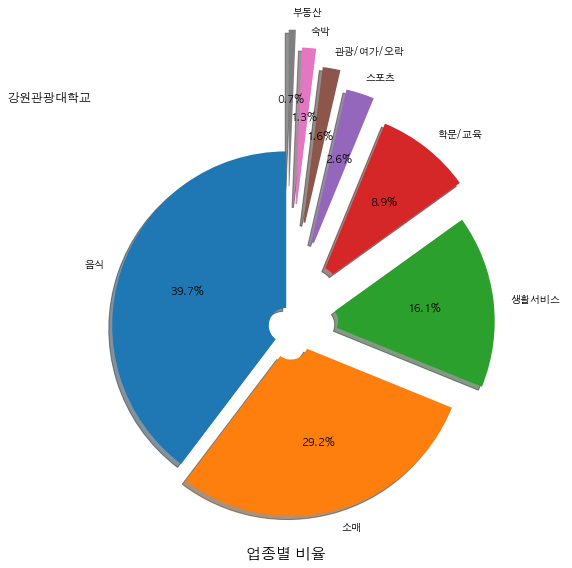

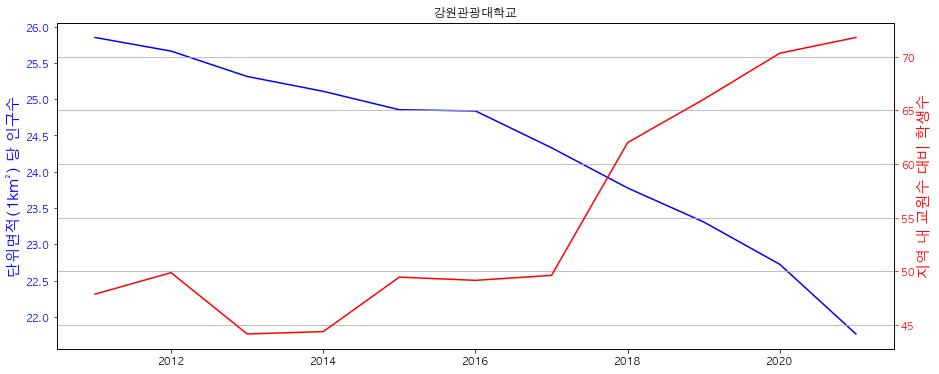

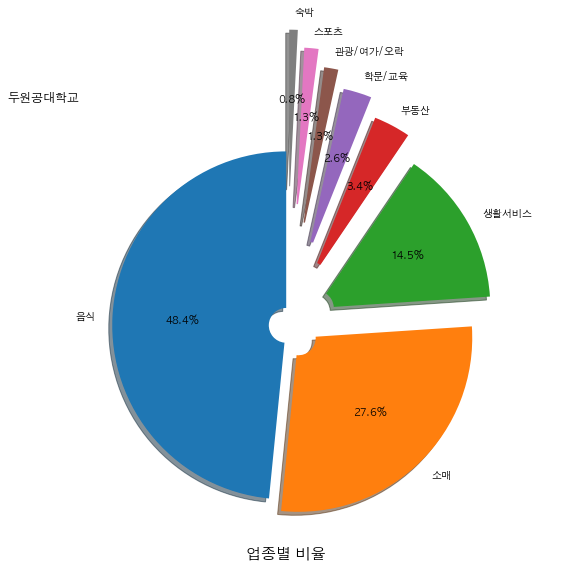

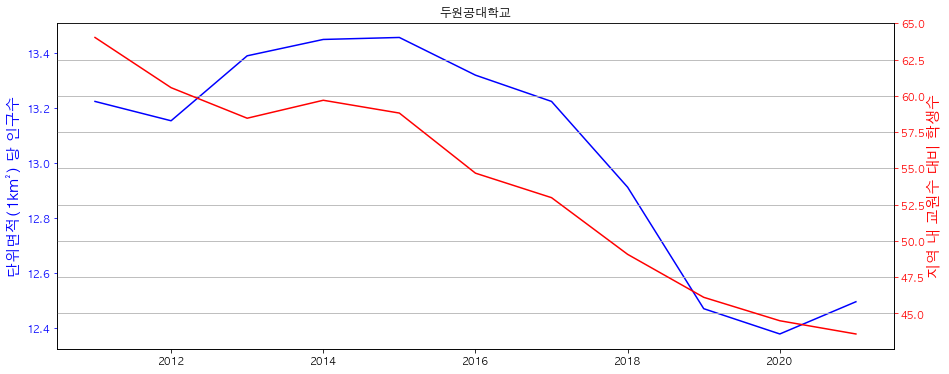

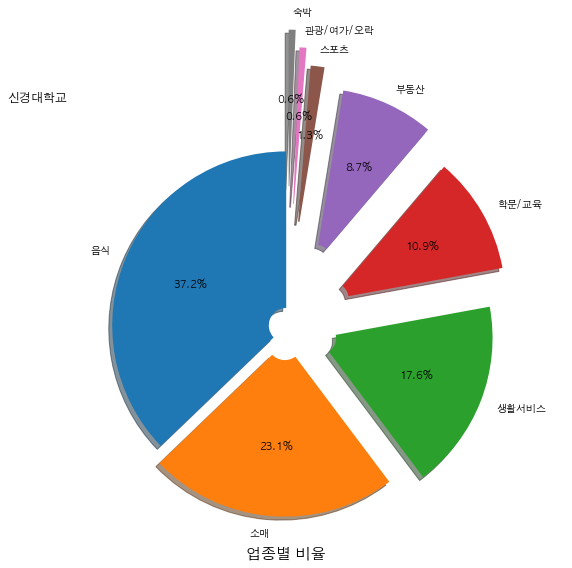

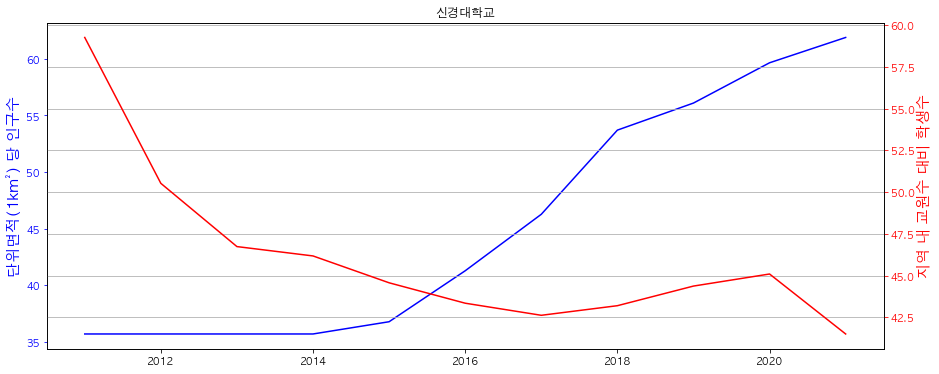

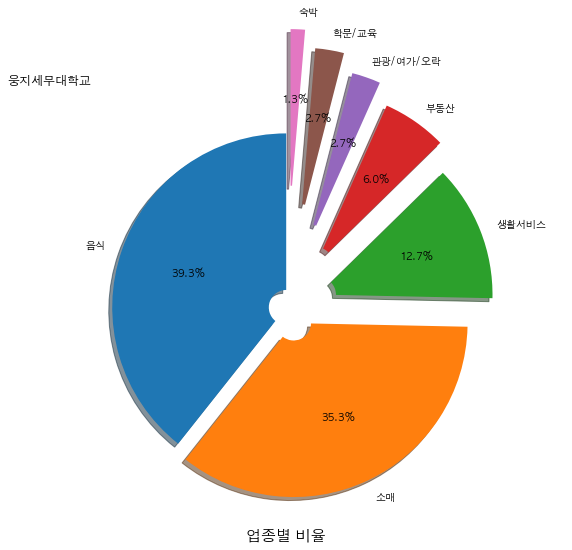

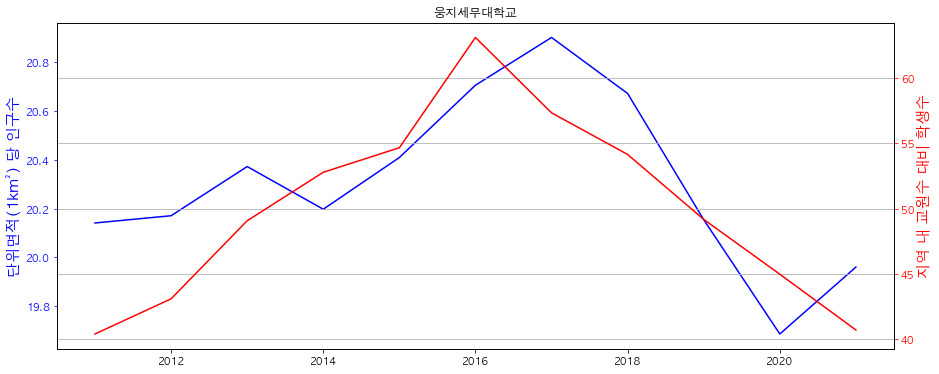

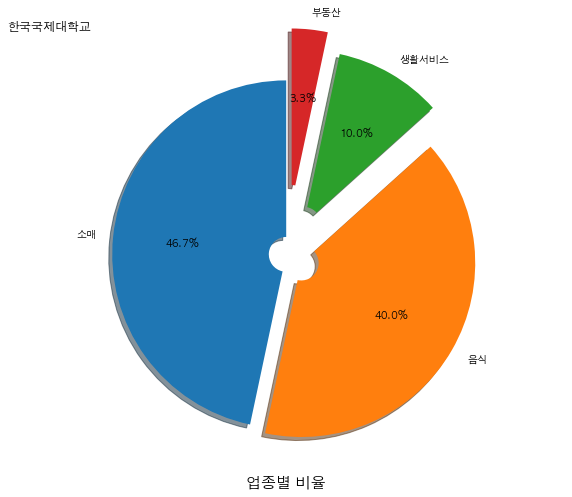

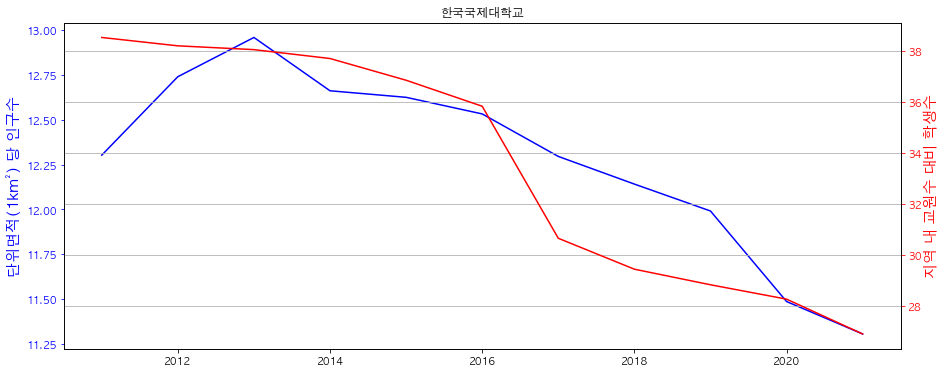

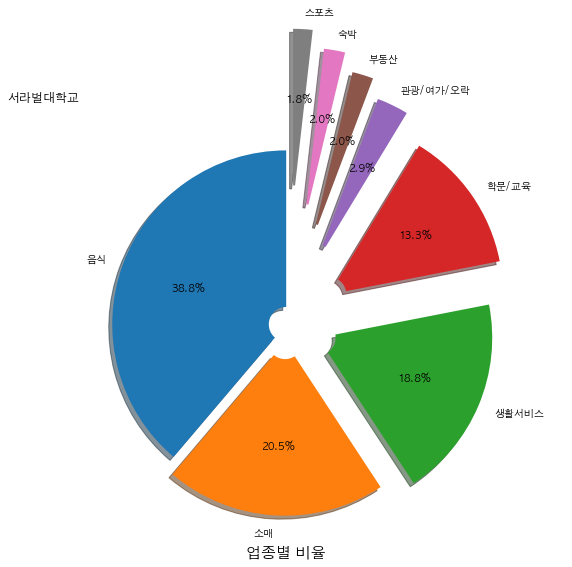

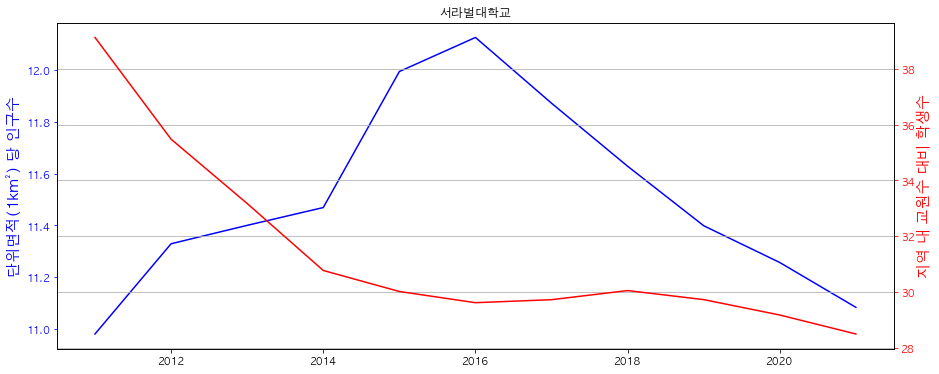

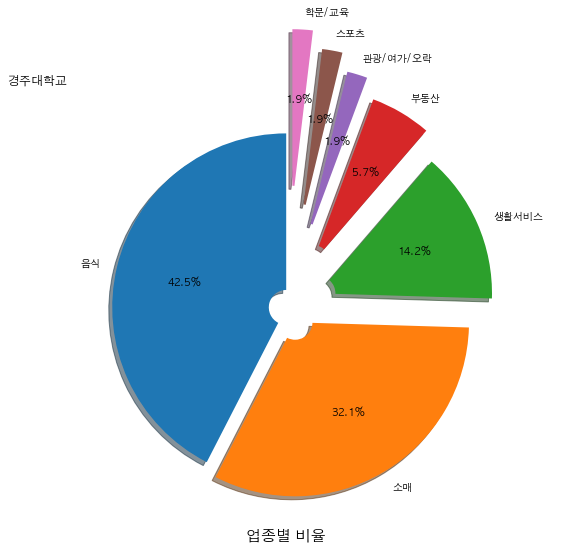

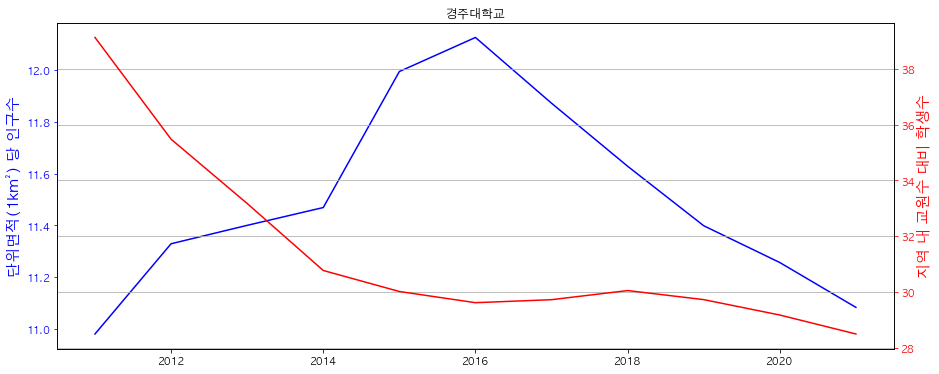

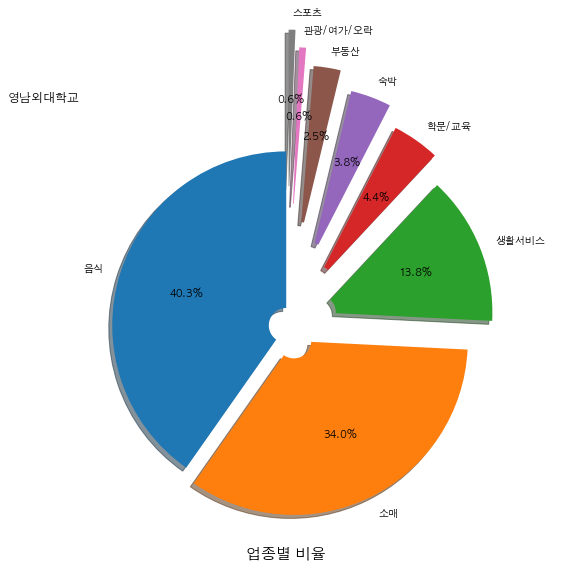

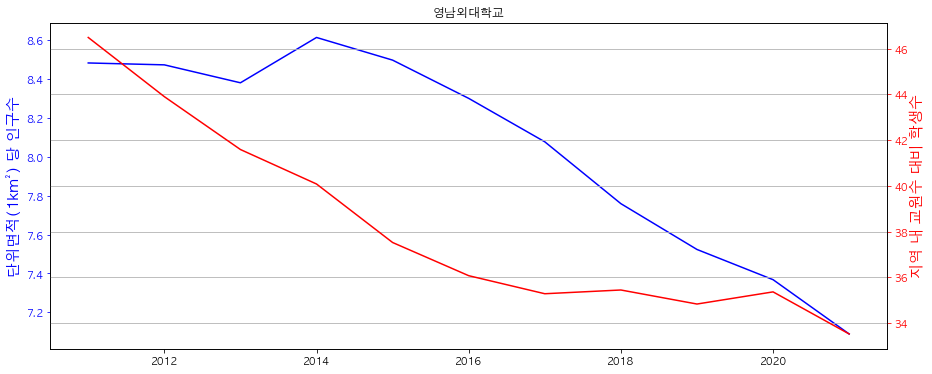

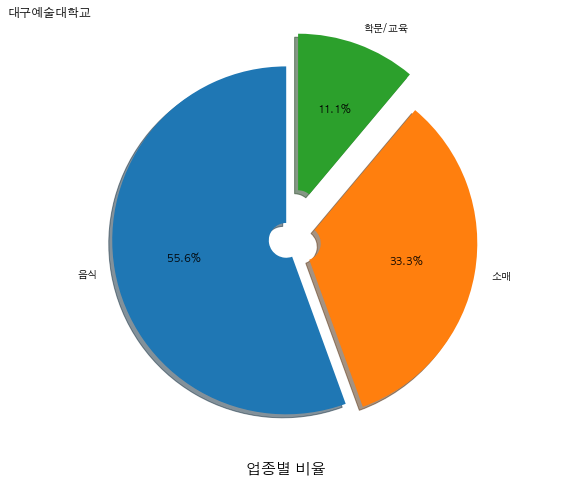

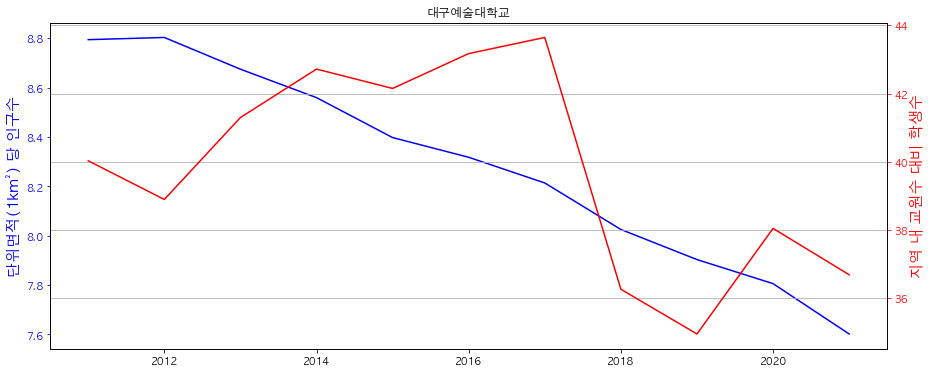

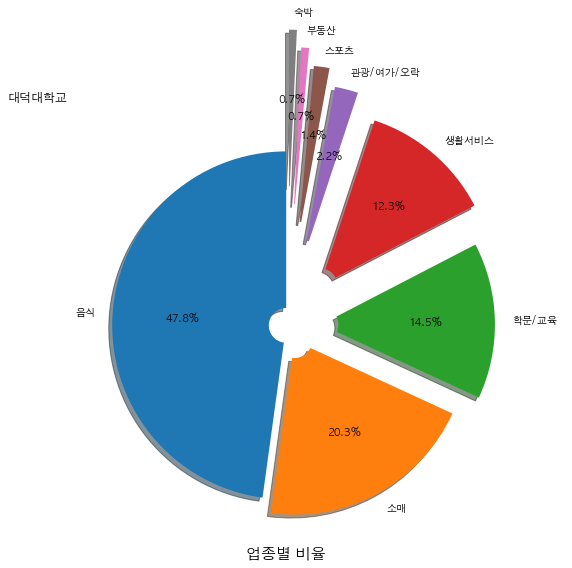

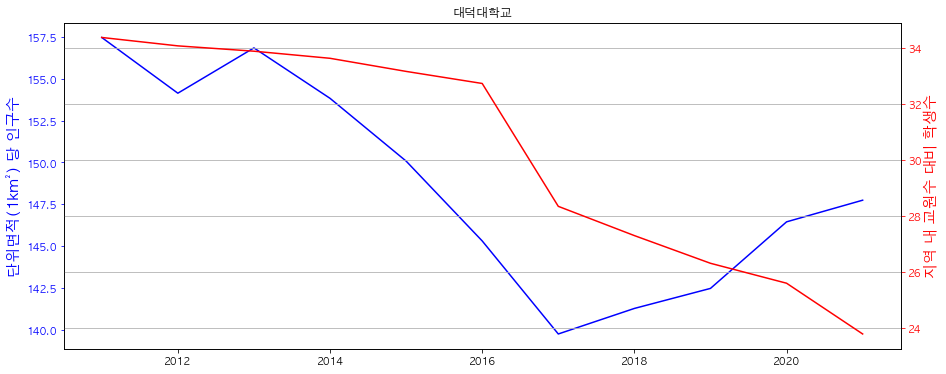

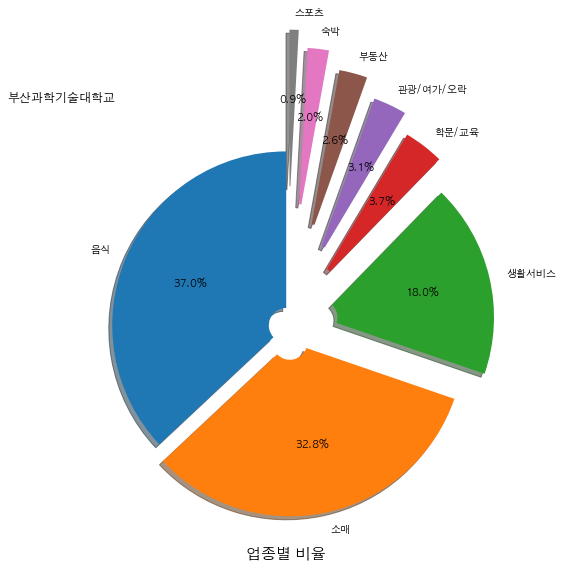

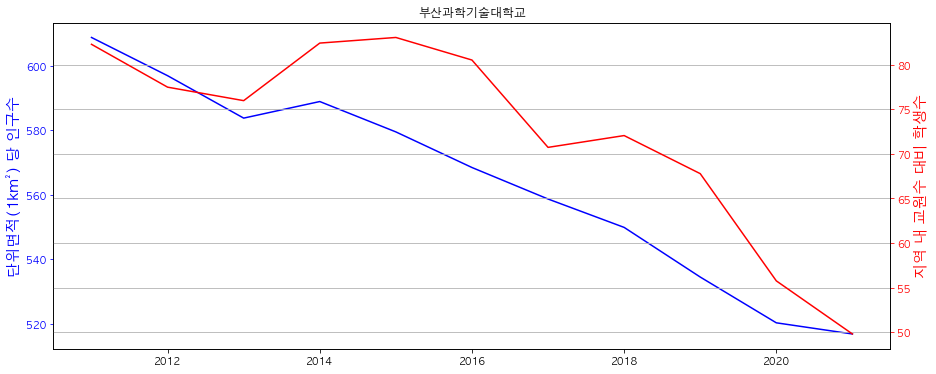

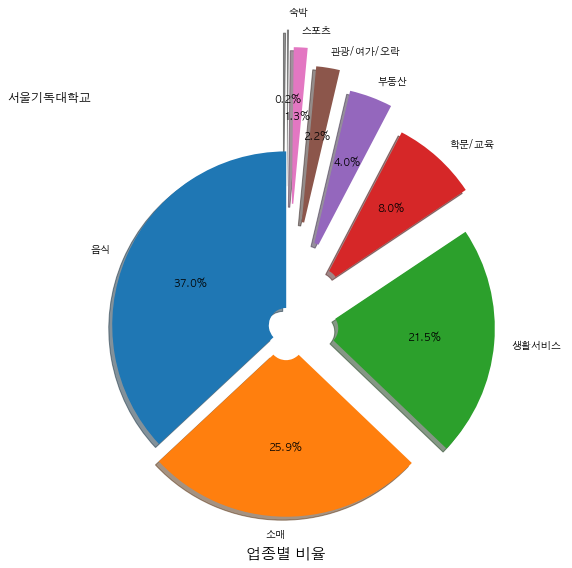

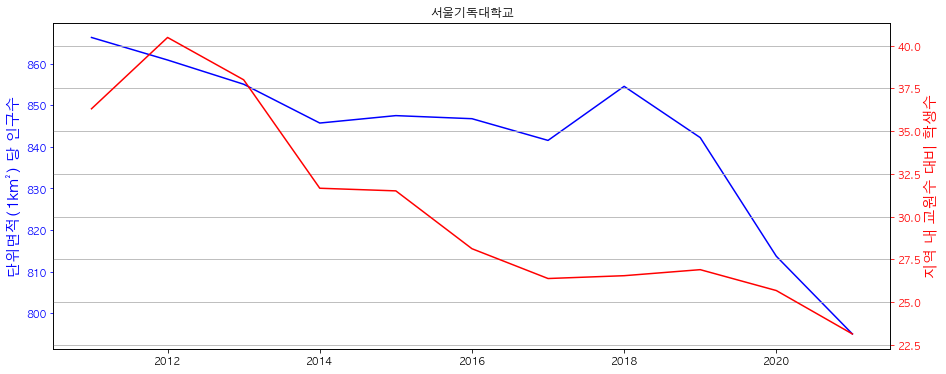

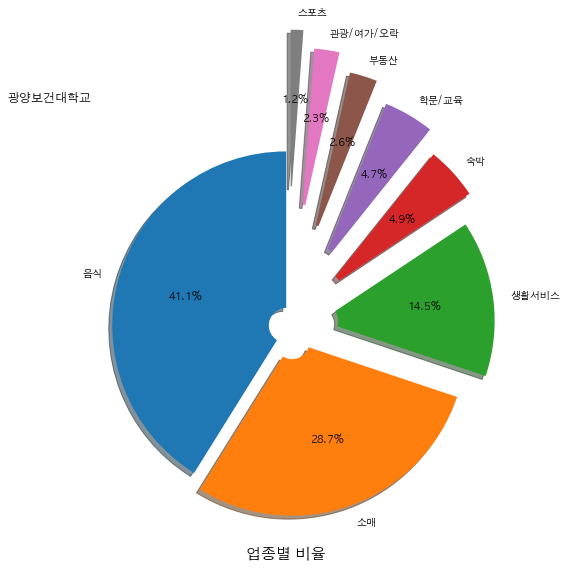

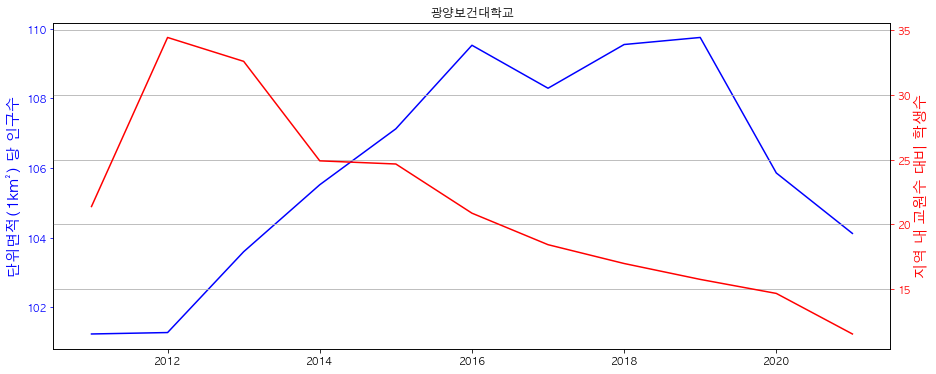

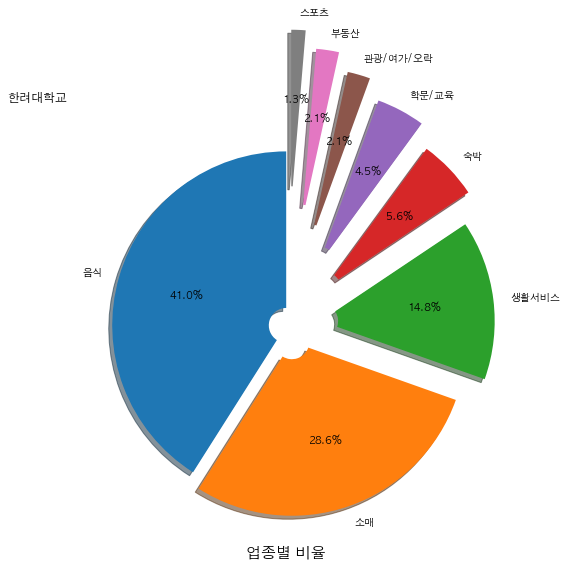

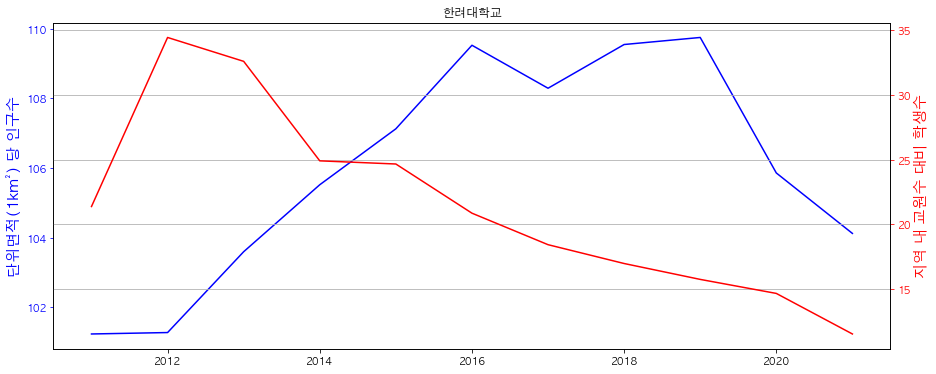

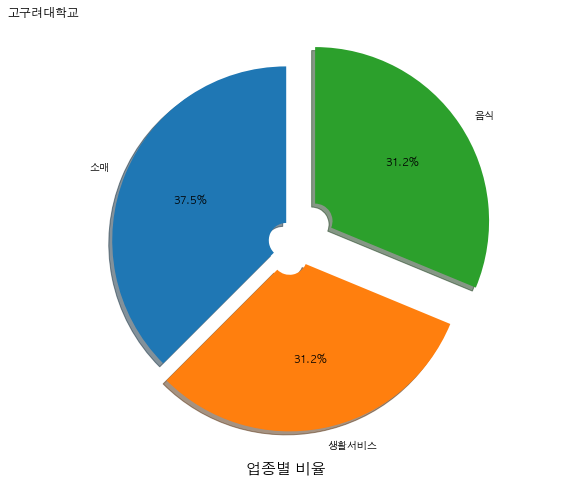

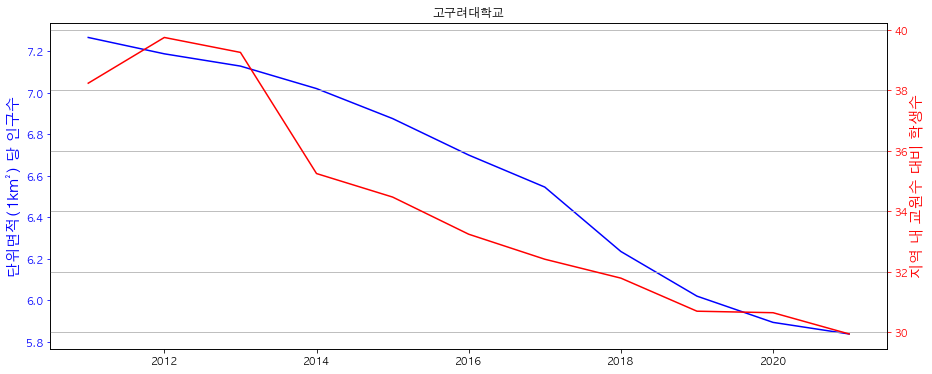

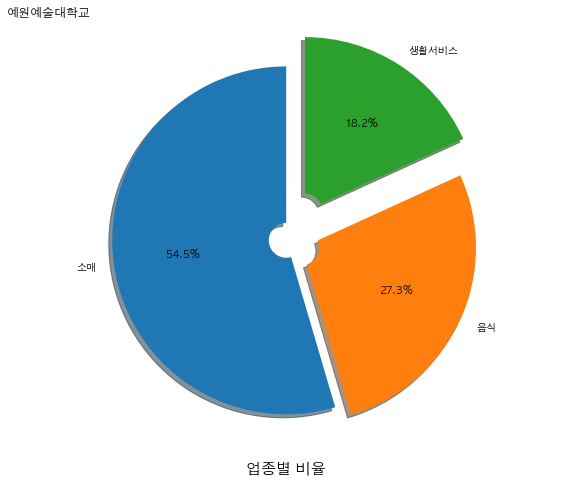

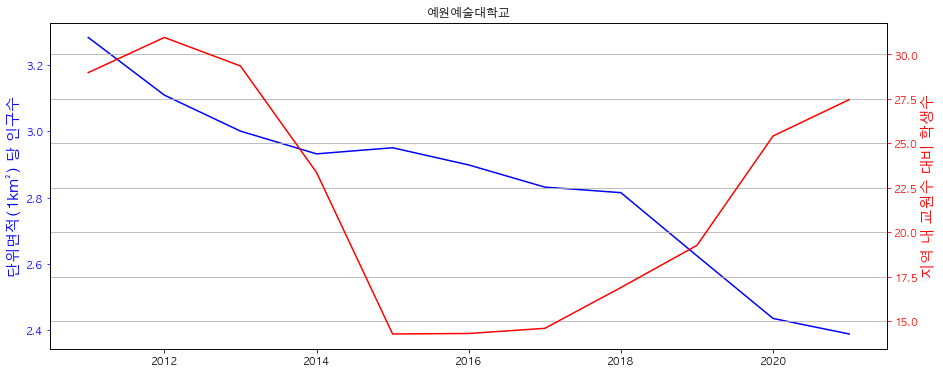

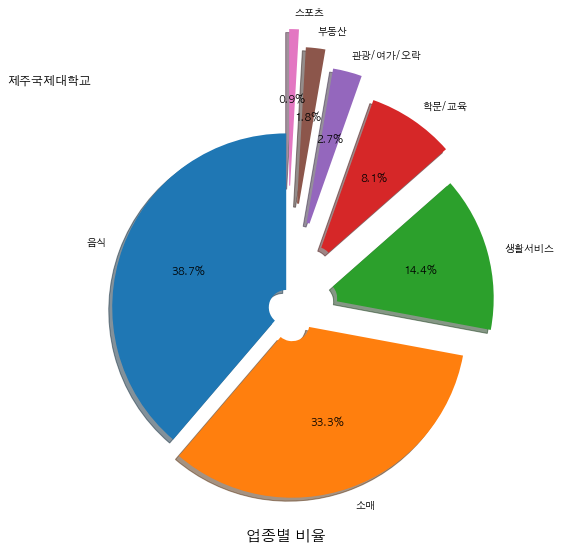

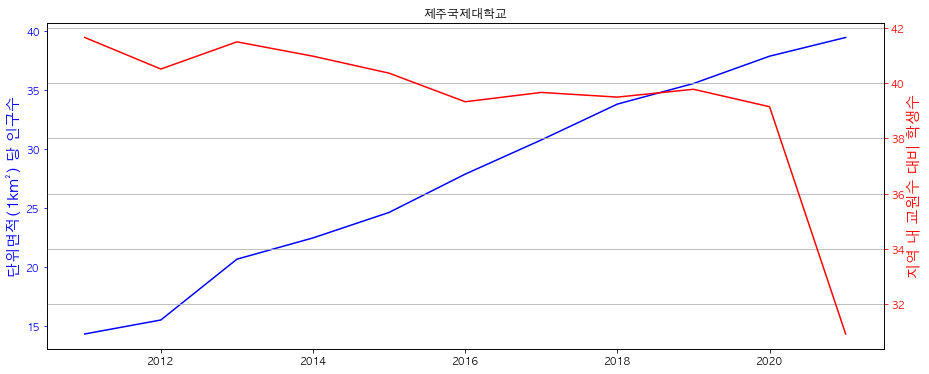

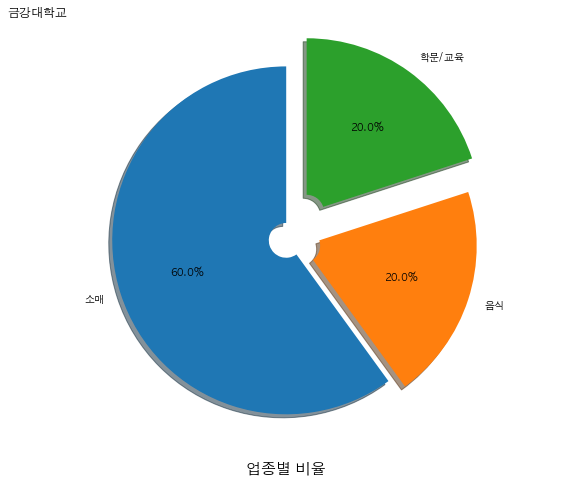

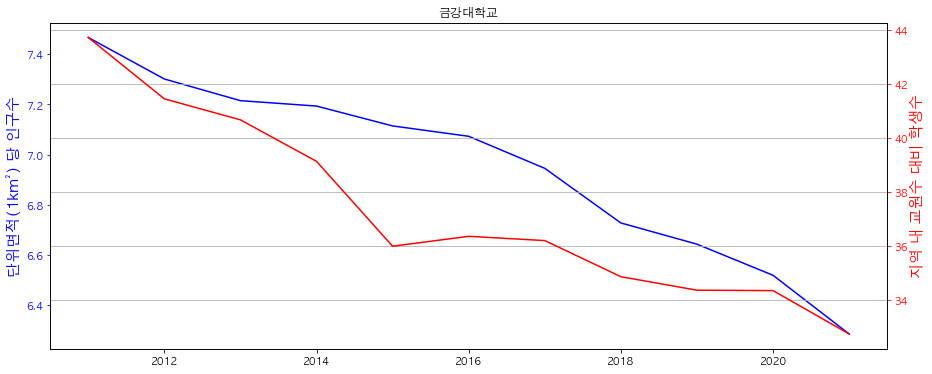

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

name_list =list(store_detail['대학교'].unique())

data2 = UAP.reset_index()
data2 = data2.drop(['시도명','시군구명'],axis=1)
for i in name_list:
    
  
    
    new_data1 = store_detail[store_detail['대학교']==i]
    new_data2 = store_detail[store_detail['대학교']==i].groupby('상권업종대분류명').size().reset_index().rename(columns={0:'사업체수'}).sort_values(by='사업체수', ascending = False)

    explode = [0.1*i for i in range(len(new_data2))]
    
    fig = plt.figure(figsize=(10,8))
    plt.title(i, loc='left')
    plt.axis('off')
#     ax01 = fig.add_subplot(1,2,1)
    ax02 = fig.add_subplot(1,1,1)

    
    
#     ax01.scatter(new_data1['경도'],new_data1['위도'])
#     ax01.xaxis.set_visible(False)
#     ax01.yaxis.set_visible(False)
#     ax01.set_xlabel('상권 분포도', fontsize= 15)
    
    ax02.pie(new_data2['사업체수'],labels=new_data2['상권업종대분류명'],autopct='%.1f%%', startangle= 90,shadow =True, explode= explode,wedgeprops=dict(width=0.9))
    ax02.set_xlabel('업종별 비율', fontsize= 15)

    
    
    plt.savefig('./visual_results/'+str(i)+'1.png')
    
    data_index= data2[data2['대학교']==i].index
    new_data = data2.iloc[data_index].transpose()
    new_data = new_data.drop('대학교').reset_index()
    new_data.columns =  ['연도', '단위면적 당 인구수']
    
    faculty_per_student = the_result[the_result['대학교']==i].drop(['대학교'],axis=1)
    faculty_per_student = faculty_per_student.transpose().reset_index()
    faculty_per_student.columns = ['연도','지역 내 교원수 대비 학생수']
    faculty_per_student['연도'] = faculty_per_student['연도'].astype(int)

    
    plt.figure(figsize=(15, 6))
    plt.title(i)
    ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

    ax1.plot(new_data['연도'], new_data['단위면적 당 인구수'], color='blue', linestyle='-')
    ax1.set_ylabel('단위면적(1km²) 당 인구수', color='blue', fontsize=15)
    ax1.tick_params('y', colors='blue')

    ax2.plot(faculty_per_student['연도'], faculty_per_student['지역 내 교원수 대비 학생수'], color='red', linestyle='-')
    ax2.set_ylabel('지역 내 교원수 대비 학생수', color='red', fontsize=15)
    ax2.tick_params('y', colors='red')
    plt.grid()

    plt.savefig('./visual_results/'+str(i)+'2.png')

   

In [56]:
# student_data = the_student.transpose().reset_index()
# faculty_data = the_faculty.transpose().reset_index()

# x= [str(i) for i in range(2007,2022)]
# faculty_data = faculty_data.set_index(['대학교','시도명','시군구명']).astype(int)
# student_data = student_data.set_index(['대학교','시도명','시군구명']).astype(int)
# faculty_data.columns = x
# student_data.columns = x

# the_result = student_data/faculty_data
# the_result = the_result.droplevel(['시도명','시군구명']).reset_index()
# the_result.drop(['2007', '2008', '2009', '2010'],axis=1,inplace =True)

# for i in name_list:
#     faculty_per_student = the_result[the_result['대학교']==i].drop(['대학교'],axis=1)
#     faculty_per_student = faculty_per_student.transpose().drop(['2007','2008','2009','2010'])
#     faculty_per_student.plot(kind='line', title='지역 내 교원수 대비 학생수')
#     print(faculty_per_student)

# the_result.merge(local_area, how='left', on=['시도명','시군구명']).reset_index()

# new_data.dtypes
# faculty_per_student.dtypes

#     plt.figure(figsize=(12, 4))
#     ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

#     ax1.plot(new_data['연도'], new_data['단위면적 당 인구수'], color='blue', linestyle='-')
#     ax1.set_ylabel('y1: np.exp', color='blue', fontsize=15)
#     ax1.tick_params('y', colors='blue')

#     ax2.plot(faculty_per_student['연도'], faculty_per_student['지역 내 교원수 대비 학생수'], color='red', linestyle='--')
#     ax2.set_ylabel('y2: np.log', color='red', fontsize=15)
#     ax2.tick_params('y', colors='red')

# import folium

# m = folium.Map(
#     location = [37.544129, 127.054357],
#     zoom_start = 11
# )
# m
# # tlies = OpenStreetMap 디폴트값 
# m = folium.Map(
#     location =[37.544129, 127.054357],
#     zoom_start = 14,
#     tiles = 'Stamen Terrain') 
# m

# m = folium.Map(
#         location = [37.544129, 127.054357],
#         zoom_start = 11
#     )
# folium.Marker([new_data1['경도'],new_data1['위도']],
#           popup=new_data1.iloc[0,0]).add_to(m)
# m

In [62]:
store_detail.to_csv('./dataset/store_detail.csv')

# -------------------------------03. 미완성-------------------------------

In [78]:
import folium
from folium import Marker

i ==input()
new_data1 = store_detail[store_detail['대학교']==i]



m = folium.Map(location = [new_data1.iloc[0,-1],new_data1.iloc[0,-2]], tiles='cartodbpositron',
               popup=new_data1.iloc[0,0], 
               zoom_start = 14)

folium.Circle(
    location = [new_data1.iloc[0,-1],new_data1.iloc[0,-2]],
    radius=2000, 
    color='#eb9e34', 
    fill_color='red',
    popup='갈 수 없을걸요?',
    tooltip=str(2)+'km'
        ).add_to(m)


folium.Circle(
    location = [new_data1.iloc[0,-1],new_data1.iloc[0,-2]],
    radius=500, 
    color='yellow', 
    fill_color='yellow',
    popup='걸어갈 수 있습니다',
    tooltip=str(1)+'km'
        ).add_to(m)


folium.Circle(
    location = [new_data1.iloc[0,-1],new_data1.iloc[0,-2]],
    radius=500, 
    color='blue', 
    fill_color='blue',
    popup='뛰어갈 수 있습니다!',
    tooltip=str(500)+'m'
        ).add_to(m)

folium.CircleMarker(
    [new_data1.iloc[0,-1],new_data1.iloc[0,-2]],
    radius=50,
    fill=True,
    color='green',
    fill_color='green',
    popup=new_data1.iloc[0,0],
    tooltip= new_data1.iloc[0,0]
        ).add_to(m)

Marker([new_data1.iloc[0,-1],new_data1.iloc[0,-2]],icon_color='red').add_to(m)


for idx,row in new_data1.iterrows():
    popup=(str(round(haversine((row['위도'],row['경도']),(row['대학교_y'],row['대학교_x']),unit='m'),1))+'m',row['상권업종중분류명'])
    Marker([row['위도'], row['경도']],popup=popup,tooltip=row['상권업종대분류명']).add_to(m)
print(i)
m


강원관광대학교


False

IndexError: single positional indexer is out-of-bounds

In [57]:
Migration

대학교,강원관광대학교,경주대학교,고구려대학교,광양보건대학교,금강대학교,대구예술대학교,대덕대학교,두원공대학교,부산과학기술대학교,서라벌대학교,서울기독대학교,신경대학교,영남외대학교,예원예술대학교,웅지세무대학교,제주국제대학교,한국국제대학교,한려대학교
시도명,강원도,경상북도,전라남도,전라남도,충청남도,경상북도,대전광역시,경기도,부산광역시,경상북도,서울특별시,경기도,경상북도,전라북도,경기도,제주특별자치도,경상남도,전라남도
시군구명,태백시,경주시,나주시,광양시,논산시,칠곡군,유성구,안성시,북구,경주시,은평구,화성시,경산시,임실군,파주시,제주시,진주시,광양시
2011 년,-663.0,-1677.0,-1482.0,4142.0,207.0,-1070.0,9968.0,1874.0,-5057.0,-1677.0,3528.0,4409.0,1813.0,321.0,21010.0,3075.0,-714.0,4142.0
2012 년,-682.0,-1383.0,178.0,-1076.0,-628.0,190.0,9221.0,24.0,3970.0,-1383.0,5683.0,3097.0,1480.0,-680.0,13065.0,4404.0,794.0,-1076.0
2013 년,-693.0,-633.0,-50.0,-344.0,-498.0,734.0,5064.0,-112.0,-4160.0,-633.0,116.0,-158.0,1244.0,-88.0,5292.0,6370.0,-1008.0,-344.0
2014 년,-553.0,-1494.0,3150.0,-529.0,-733.0,293.0,10751.0,-832.0,-3696.0,-1494.0,-6900.0,6118.0,4061.0,405.0,7553.0,8338.0,2325.0,-529.0
2015 년,-693.0,-1587.0,7566.0,475.0,-180.0,126.0,4937.0,-2202.0,2573.0,-1587.0,-2954.0,50669.0,1746.0,492.0,9757.0,8507.0,3425.0,475.0
2016 년,-348.0,25.0,6168.0,1319.0,-712.0,-275.0,5143.0,2378.0,-1259.0,25.0,-8061.0,39036.0,-18.0,129.0,5467.0,8539.0,1657.0,1319.0
2017 년,-1000.0,-961.0,5756.0,-291.0,-395.0,-2640.0,2933.0,-164.0,-7798.0,-961.0,-5235.0,45213.0,792.0,203.0,5733.0,6643.0,-258.0,-291.0
2018 년,-893.0,-121.0,3746.0,242.0,-1373.0,-2229.0,-463.0,902.0,-6184.0,-121.0,-4030.0,62608.0,1239.0,130.0,12947.0,5877.0,-723.0,242.0


In [57]:
for i in name_list:
    faculty_per_student = the_result[the_result['대학교']==i].drop(['대학교'],axis=1)
    faculty_per_student = faculty_per_student.transpose().drop(['2007','2008','2009','2010'])
    faculty_per_student.plot(kind='line', title='지역 내 교원수 대비 학생수')
    print(faculty_per_student)

KeyError: "['2007' '2008' '2009' '2010'] not found in axis"

In [55]:
the_result.merge(local_area, how='left', on=['시도명','시군구명']).reset_index()

KeyError: '시도명'

In [ ]:
new_data.dtypes
faculty_per_student.dtypes

In [ ]:
    plt.figure(figsize=(12, 4))
    ax1, ax2 = plt.gca(), plt.gca().twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis 

    ax1.plot(new_data['연도'], new_data['단위면적 당 인구수'], color='blue', linestyle='-')
    ax1.set_ylabel('y1: np.exp', color='blue', fontsize=15)
    ax1.tick_params('y', colors='blue')

    ax2.plot(faculty_per_student['연도'], faculty_per_student['지역 내 교원수 대비 학생수'], color='red', linestyle='--')
    ax2.set_ylabel('y2: np.log', color='red', fontsize=15)
    ax2.tick_params('y', colors='red')

In [ ]:
import folium

m = folium.Map(
    location = [37.544129, 127.054357],
    zoom_start = 11
)
m
# tlies = OpenStreetMap 디폴트값 
m = folium.Map(
    location =[37.544129, 127.054357],
    zoom_start = 14,
    tiles = 'Stamen Terrain') 
m

In [ ]:
m = folium.Map(
        location = [37.544129, 127.054357],
        zoom_start = 11
    )
folium.Marker([new_data1['경도'],new_data1['위도']],
          popup=new_data1.iloc[0,0]).add_to(m)
m

In [58]:
foreign_student.replace('*',0)

대학교,강원관광대학교,경주대학교,고구려대학교,광양보건대학교,금강대학교,대구예술대학교,대덕대학교,두원공대학교,부산과학기술대학교,서라벌대학교,서울기독대학교,신경대학교,영남외대학교,예원예술대학교,웅지세무대학교,제주국제대학교,한국국제대학교,한려대학교
시도명,강원도,경상북도,전라남도,전라남도,충청남도,경상북도,대전광역시,경기도,부산광역시,경상북도,서울특별시,경기도,경상북도,전라북도,경기도,제주특별자치도,경상남도,전라남도
시군구명,태백시,경주시,나주시,광양시,논산시,칠곡군,유성구,안성시,북구,경주시,은평구,화성시,경산시,임실군,파주시,제주시,진주시,광양시
2016 년,0,1037,367,0,317,122,2392,537,572,1037,201,475,2840,0,45,1110,637,0
2017 년,0,1368,495,0,322,97,2611,601,683,1368,218,561,3799,0,74,1339,956,0
2018 년,0,2109,620,0,275,95,2750,802,1128,2109,237,765,5013,0,87,1873,1002,0
2019 년,0,2071,466,0,233,17,2657,828,1150,2071,304,923,6188,0,94,2266,1270,0
2020 년,0,1607,521,0,240,132,2267,785,949,1607,280,773,5378,0,84,2009,991,0


In [88]:
store_detail[store_detail['대학교']=='영남외대학교']

,대학교,대학교 좌표,반경,시도명,시군구명,행정동명,1km 이내 거리(m),상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도,대학교_x,대학교_y
1183,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남천면,-45.855097,소매,화장품소매,화장품판매점,128.731374,35.786924,128.733492,35.786244
1189,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,787.316012,생활서비스,광고/인쇄,광고물제작-종합,128.736096,35.801100,128.733492,35.786244
1190,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,874.577231,소매,종합소매점,편의점,128.738615,35.800779,128.733492,35.786244
1195,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,683.776430,음식,닭/오리요리,오리고기전문,128.737094,35.798940,128.733492,35.786244
1196,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남천면,61.906557,숙박,캠프/별장/펜션,캠프/별장/펜션,128.733184,35.791222,128.733492,35.786244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,884.758438,소매,가구소매,일반가구소매,128.736726,35.802259,128.733492,35.786244
2051,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,881.639386,학문/교육,학원기타,학원-기타,128.738803,35.800723,128.733492,35.786244
2053,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,885.512366,음식,한식,한식/백반/한정식,128.735811,35.802670,128.733492,35.786244
2054,영남외대학교,"(128.7334924667693, 35.78624419579164)",286.097885,경상북도,경산시,남부동,936.964188,소매,애견/애완/동물,애완동물 미용실,128.736656,35.803080,128.733492,35.786244


# 머신러닝 데이터셋

In [200]:
a1 = store_detail.groupby(['대학교']).size().to_frame().rename(columns={0:'사업체수'})


a2 = UAP.reset_index().set_index('대학교').drop(['시도명','시군구명'], axis=1).mean(axis=1).to_frame().rename(columns={0:'단위면적 당 인구수 평균'})


a3 = Migration.transpose().mean(axis=1).reset_index().drop(['시도명','시군구명'],axis=1).rename(columns={0:'순이동 인구 평균'}).set_index('대학교')


a4 = the_result.set_index('대학교').mean(axis=1).to_frame().rename(columns={0:'교원수 당 학생수'})


a5 = Migration.transpose().mean(axis=1).reset_index().drop(0,axis=1)
a5 = foreigner.drop(['[11101HJG]행정구역(시군구)별','시군구코드', '시도코드'],axis=1).merge(a5, how='right')
a5 = a5[a5['거주외국인별']=='합계'].drop(['거주외국인별','시군구명','시도명'],axis=1).set_index('대학교')
a5 = a5.mean(axis=1).to_frame().rename(columns={0:'외국인 평균'})

In [201]:
a = pd.concat([a1,a2,a3,a4,a5], axis=1)

In [202]:
a

,사업체수,단위면적 당 인구수 평균,순이동 인구 평균,교원수 당 학생수,외국인 평균
대학교,,,,,
강원관광대학교,305,24.321093,-757.090909,54.971842,1.037209e+14
경주대학교,106,11.503600,-820.000000,31.400010,2.788231e+23
고구려대학교,16,6.609892,2645.636364,34.152217,8.008872e+18
광양보건대학교,428,105.985099,-241.181818,21.470603,6.088636e+18
금강대학교,5,6.953198,-657.636364,37.255378,1.176328e+19
대구예술대학교,9,8.281960,-808.272727,39.803337,1.188518e+19
대덕대학교,138,148.674906,4131.181818,30.283520,1.623374e+20
두원공대학교,380,13.042722,831.818182,53.860647,2.920433e+23
부산과학기술대학교,2931,564.212915,-3061.272727,72.523240,6.182697e+18


In [204]:
corr_matrix = a.corr()
corr_matrix

,사업체수,단위면적 당 인구수 평균,순이동 인구 평균,교원수 당 학생수,외국인 평균
사업체수,1.000000,0.979517,-0.230863,0.251908,-0.169656
단위면적 당 인구수 평균,0.979517,1.000000,-0.221433,0.176643,-0.234166
순이동 인구 평균,-0.230863,-0.221433,1.000000,0.146572,0.869991
교원수 당 학생수,0.251908,0.176643,0.146572,1.000000,0.226440
외국인 평균,-0.169656,-0.234166,0.869991,0.226440,1.000000


array([[<AxesSubplot:xlabel='사업체수', ylabel='사업체수'>,
        <AxesSubplot:xlabel='단위면적 당 인구수 평균', ylabel='사업체수'>,
        <AxesSubplot:xlabel='순이동 인구 평균', ylabel='사업체수'>,
        <AxesSubplot:xlabel='교원수 당 학생수', ylabel='사업체수'>,
        <AxesSubplot:xlabel='외국인 평균', ylabel='사업체수'>],
       [<AxesSubplot:xlabel='사업체수', ylabel='단위면적 당 인구수 평균'>,
        <AxesSubplot:xlabel='단위면적 당 인구수 평균', ylabel='단위면적 당 인구수 평균'>,
        <AxesSubplot:xlabel='순이동 인구 평균', ylabel='단위면적 당 인구수 평균'>,
        <AxesSubplot:xlabel='교원수 당 학생수', ylabel='단위면적 당 인구수 평균'>,
        <AxesSubplot:xlabel='외국인 평균', ylabel='단위면적 당 인구수 평균'>],
       [<AxesSubplot:xlabel='사업체수', ylabel='순이동 인구 평균'>,
        <AxesSubplot:xlabel='단위면적 당 인구수 평균', ylabel='순이동 인구 평균'>,
        <AxesSubplot:xlabel='순이동 인구 평균', ylabel='순이동 인구 평균'>,
        <AxesSubplot:xlabel='교원수 당 학생수', ylabel='순이동 인구 평균'>,
        <AxesSubplot:xlabel='외국인 평균', ylabel='순이동 인구 평균'>],
       [<AxesSubplot:xlabel='사업체수', ylabel='교원수 당 학생수'>,
        <AxesSubplot:xlabel

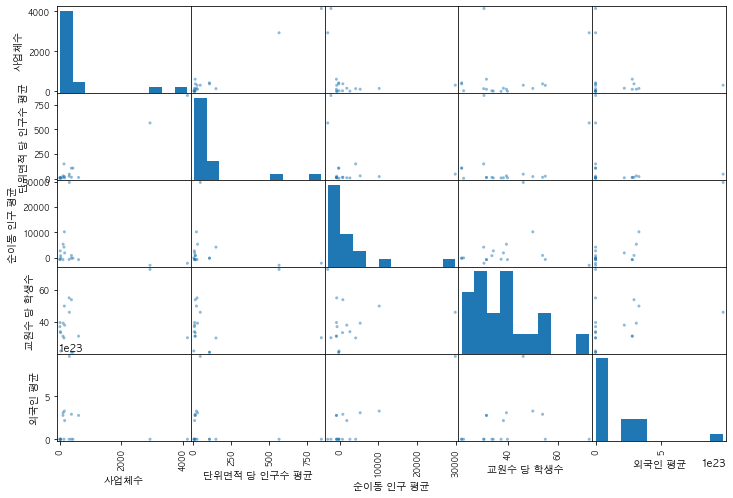

In [206]:
from pandas.plotting import scatter_matrix
scatter_matrix(a,figsize=(12,8))

array([[<AxesSubplot:title={'center':'사업체수'}>,
        <AxesSubplot:title={'center':'단위면적 당 인구수 평균'}>],
       [<AxesSubplot:title={'center':'순이동 인구 평균'}>,
        <AxesSubplot:title={'center':'교원수 당 학생수'}>],
       [<AxesSubplot:title={'center':'외국인 평균'}>, <AxesSubplot:>]],
      dtype=object)

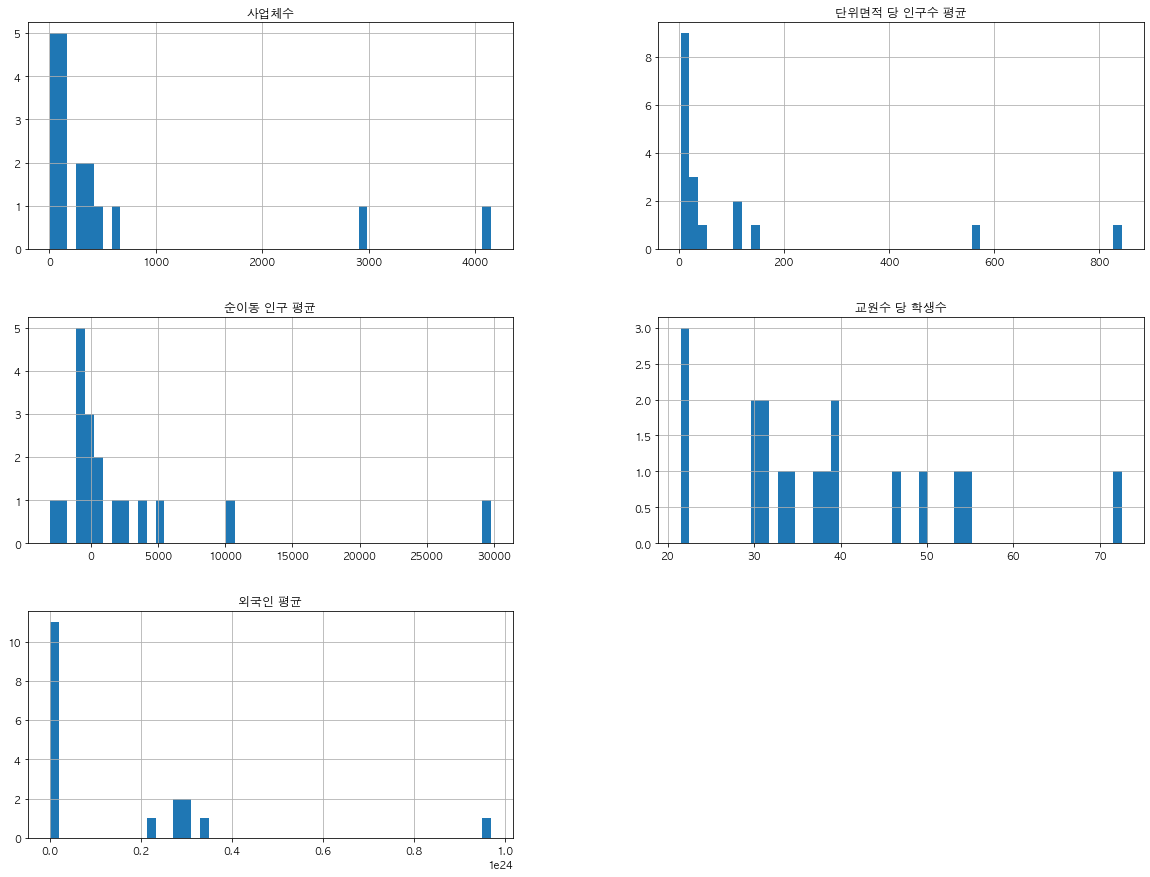

In [207]:
a.hist(bins=50, figsize=(20,15))
plt.show()

In [208]:
store_detail

,대학교,대학교 좌표,반경,시도명,시군구명,행정동명,1km 이내 거리(m),상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도,대학교_x,대학교_y
0,강원관광대학교,"(128.97419025184723, 37.16149477794874)",429.722003,강원도,태백시,상장동,498.773863,소매,의복의류,일반의류,128.982513,37.162566,128.974190,37.161495
1,강원관광대학교,"(128.97419025184723, 37.16149477794874)",429.722003,강원도,태백시,상장동,616.598374,음식,한식,갈비/삼겹살,128.983482,37.159133,128.974190,37.161495
2,강원관광대학교,"(128.97419025184723, 37.16149477794874)",429.722003,강원도,태백시,삼수동,965.590227,생활서비스,주택수리,주택수리종합,128.978899,37.179987,128.974190,37.161495
3,강원관광대학교,"(128.97419025184723, 37.16149477794874)",429.722003,강원도,태백시,상장동,804.075320,음식,한식,갈비/삼겹살,128.985278,37.162173,128.974190,37.161495
4,강원관광대학교,"(128.97419025184723, 37.16149477794874)",429.722003,강원도,태백시,상장동,668.857644,소매,종합소매점,수퍼마켓,128.984027,37.162959,128.974190,37.161495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,금강대학교,"(127.19642662197457, 36.30549641819005)",365.770420,충청남도,논산시,상월면,385.869935,소매,종합소매점,편의점,127.189714,36.306819,127.196427,36.305496
10244,금강대학교,"(127.19642662197457, 36.30549641819005)",365.770420,충청남도,논산시,상월면,385.869935,음식,커피점/카페,커피전문점/카페/다방,127.189714,36.306819,127.196427,36.305496
10245,금강대학교,"(127.19642662197457, 36.30549641819005)",365.770420,충청남도,논산시,상월면,794.769066,소매,음/식료품소매,청과물소매,127.187700,36.296027,127.196427,36.305496
10246,금강대학교,"(127.19642662197457, 36.30549641819005)",365.770420,충청남도,논산시,상월면,877.567494,학문/교육,도서관/독서실,독서실,127.188578,36.318672,127.196427,36.305496


In [210]:
b = store_detail[['대학교', '반경', '1km 이내 거리(m)', '상권업종대분류명']]
b

,대학교,반경,1km 이내 거리(m),상권업종대분류명
0,강원관광대학교,429.722003,498.773863,소매
1,강원관광대학교,429.722003,616.598374,음식
2,강원관광대학교,429.722003,965.590227,생활서비스
3,강원관광대학교,429.722003,804.075320,음식
4,강원관광대학교,429.722003,668.857644,소매
...,...,...,...,...
10243,금강대학교,365.770420,385.869935,소매
10244,금강대학교,365.770420,385.869935,음식
10245,금강대학교,365.770420,794.769066,소매
10246,금강대학교,365.770420,877.567494,학문/교육


In [213]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
b_cat = b[['상권업종대분류명']]
b_cat_1hot = cat_encoder.fit_transform(b_cat)
b_cat_1hot

<10248x8 sparse matrix of type '<class 'numpy.float64'>'
	with 10248 stored elements in Compressed Sparse Row format>

In [226]:
b['encoded']= {'encoded':b_cat_1hot.toarray()}

ValueError: Length of values (1) does not match length of index (10248)

In [221]:
c

0    [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0....
Name: 대분류명, dtype: object